In [1]:
import math
import numpy as np

In [2]:
import ellipsefns
#getfocus, getsemiminor, theoreticalx, theoreticaly

In [3]:
import initdatuneq

In [154]:
delta=0.005 #with dtmin=0.001, accuracy of 1e-6 appears to be too much to ask. try 0.05
rad0=50
ecc0=1.0 #set ecc = 0 for circle, ecc < 1 for ellepse, = 1 for parabola, >1 for hyperbola
theta0= 0.0 #math.pi/6. #math.pi/6.
mass0_1=20.0
mass0_2=3.0
initdatequneq=initdatuneq.InitialDataEqualMassConic(rad0,ecc0,theta0,mass0_1,mass0_2)
print(initdatequneq)

angle 3.141592653589793
1.0
(array([6.28318531, 3.14159265]), 3.141592653589793, 10, 1.0, array([20.,  3.]))


In [155]:
import getxyuvtwouneq_apper #unequal mass version

In [156]:
useperihelion=True

In [157]:
xyuvaequneq=getxyuvtwouneq_apper.getxyuvequneq(initdatequneq,useperihelion)
print(xyuvaequneq)
masses,xvec,avec=xyuvaequneq

initdat 10 [6.28318531 3.14159265] 1.0 [ 1. -1.] [-2.4492936e-16  1.2246468e-16]
coordsep 10
pi
[ 10. -10.]
[-2.4492936e-15  0.0000000e+00]
parabola
(array([20.,  3.]), array([[ 1.30434783e+00, -3.19473078e-16,  0.00000000e+00,
         6.85193417e-17,  2.79751442e-01,  0.00000000e+00],
       [-8.69565217e+00,  0.00000000e+00,  0.00000000e+00,
        -0.00000000e+00, -1.86500962e+00,  0.00000000e+00]]), array([[-3.00000000e-02,  7.34788079e-18,  0.00000000e+00],
       [ 2.00000000e-01, -0.00000000e+00,  0.00000000e+00]]))


In [158]:
import RK4implicit

In [159]:
def RK4implicit(h,t,xvec,f): #not a finite difference so no step in y
    k1= h*f(t,xvec)
    k2=h*f(t+h/2, xvec+k1/2)
    k3=h*f(t+h/2,xvec+k2/2)
    k4=h*f(t+h,xvec+k3)
    return t+h, xvec+1/6.*(k1+2.*k2+2.*k3+k4)

In [160]:
import OrbitDiffEqAdaptive

In [161]:
masses, xvec,avec=xyuvaequneq
ODEeq= OrbitDiffEqAdaptive.OrbitDiffEqAdaptive(masses,xvec,avec,0.0, delta)
ODEeq.print2D()
ODEeq.print2D()

[20.  3.] [[ 1.30434783e+00 -3.19473078e-16  0.00000000e+00  6.85193417e-17
   2.79751442e-01  0.00000000e+00]
 [-8.69565217e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  -1.86500962e+00  0.00000000e+00]] 0.0
[20.  3.] [[ 1.30434783e+00 -3.19473078e-16  0.00000000e+00  6.85193417e-17
   2.79751442e-01  0.00000000e+00]
 [-8.69565217e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  -1.86500962e+00  0.00000000e+00]] 0.0


In [162]:
print(xyuvaequneq)

(array([20.,  3.]), array([[ 1.30434783e+00, -3.19473078e-16,  0.00000000e+00,
         6.85193417e-17,  2.79751442e-01,  0.00000000e+00],
       [-8.69565217e+00,  0.00000000e+00,  0.00000000e+00,
        -0.00000000e+00, -1.86500962e+00,  0.00000000e+00]]), array([[-3.00000000e-02,  7.34788079e-18,  0.00000000e+00],
       [ 2.00000000e-01, -0.00000000e+00,  0.00000000e+00]]))


In [163]:
import timestepAdaptive

In [164]:
import parabfns

In [165]:
import ellipsefns

In [166]:
import hyperbfns

In [167]:
numsteps=10000 #50000

#numsteps=6000*10

dt=.01
dtmax=1
dtmin = 0.001
outputevery=1
nptimes, npstar1x, npstar2x, npstar1a, npstar2a,nperr,npdt= timestepAdaptive.timestepAdaptive(numsteps,dt,dtmax,dtmin,xyuvaequneq,outputevery,delta)

0.01
[ 4.49998275e-06 -2.79750692e-03  0.00000000e+00]
[2.02498448e-11 7.82604496e-06 0.00000000e+00]
7.826065206583262e-06
0.002797510537349817
53.61910098186812 False
0.02435411718687542
[ 3.39955653e-05 -6.81292591e-03  0.00000000e+00]
[1.15569846e-09 4.64159594e-05 0.00000000e+00]
4.641711511005285e-05
0.006813010722878165
22.016698065115083 False
0.04747915133066651
[ 0.00015035 -0.01328063  0.        ]
[2.26046050e-08 1.76375141e-04 0.00000000e+00]
0.00017639774557433256
0.013281481301960734
11.293920955778903 False
0.07833514342690848
[ 0.00046815 -0.02190423  0.        ]
[2.19168350e-07 4.79795495e-04 0.00000000e+00]
0.000480014663631643
0.021909236947726934
6.846427393061828 False
0.11404208638372546
[ 0.00113127 -0.03186288  0.        ]
[1.27977540e-06 1.01524281e-03 0.00000000e+00]
0.0010165225863915702
0.03188295134380709
4.7047087448865 False
0.15116138038142765
[ 0.00226285 -0.04216525  0.        ]
[5.12047153e-06 1.77790836e-03 0.00000000e+00]
0.0017830288308594258
0.042

0.9
[ 0.087321   -0.03520819  0.        ]
[0.00762496 0.00123962 0.        ]
0.008864573881602514
0.09415186605480803
1.593170760021702 False
0.9
[ 0.08698127 -0.03488226  0.        ]
[0.00756574 0.00121677 0.        ]
0.008782514393719737
0.09371507025937577
1.6005963564327923 False
0.9
[ 0.08664658 -0.03456355  0.        ]
[0.00750763 0.00119464 0.        ]
0.008702269066917652
0.09328595321331959
1.6079591281764662 False
0.9
[ 0.08631681 -0.03425178  0.        ]
[0.00745059 0.00117318 0.        ]
0.00862377568003847
0.0928642863540041
1.6152603534602228 False
0.9
[ 0.08599182 -0.03394675  0.        ]
[0.00739459 0.00115238 0.        ]
0.008546974873190383
0.09244985058500843
1.6225012701569885 False
0.9
[ 0.08567151 -0.03364821  0.        ]
[0.00733961 0.0011322  0.        ]
0.008471809983968914
0.09204243577811766
1.6296830775056614 False
0.9
[ 0.08535577 -0.03335595  0.        ]
[0.00728561 0.00111262 0.        ]
0.00839822689483235
0.09164184030688358
1.6368069377228875 False
0.9

0.9
[ 0.06493343 -0.01803881  0.        ]
[0.00421635 0.0003254  0.        ]
0.004541749757121415
0.06739250519992127
2.2257667904616674 False
0.9
[ 0.06482692 -0.01797476  0.        ]
[0.00420253 0.00032309 0.        ]
0.00452562135757306
0.06727273859129759
2.2297293545799546 False
0.9
[ 0.0647211  -0.01791125  0.        ]
[0.00418882 0.00032081 0.        ]
0.004509633214248116
0.06715380267898546
2.233678422010489 False
0.9
[ 0.06461595 -0.0178483   0.        ]
[0.00417522 0.00031856 0.        ]
0.004493783401371762
0.06703568752069126
2.237614105974537 False
0.9
[ 0.06451149 -0.01778589  0.        ]
[0.00416173 0.00031634 0.        ]
0.004478070029145555
0.0669183833422891
2.2415365181903226 False
0.9
[ 0.06440769 -0.01772402  0.        ]
[0.00414835 0.00031414 0.        ]
0.004462491242900526
0.06680188053416256
2.245445768900021 False
0.9
[ 0.06430455 -0.01766267  0.        ]
[0.00413508 0.00031197 0.        ]
0.004447045222272843
0.06668616964763266
2.249341966896504 False
0.9
[

[0.00309691 0.00016817 0.        ]
0.003265083841409382
0.05714091215065946
2.6250893511203577 False
0.9
[ 0.05559218 -0.01293975  0.        ]
[0.00309049 0.00016744 0.        ]
0.0032579281287811704
0.057078263189949734
2.6279706427089007 False
0.9
[ 0.05553471 -0.01291149  0.        ]
[0.0030841  0.00016671 0.        ]
0.003250811072447664
0.05701588438713955
2.6308458004701905 False
0.9
[ 0.05547748 -0.01288337  0.        ]
[0.00307775 0.00016598 0.        ]
0.003243732341228676
0.056953773722455615
2.6337148567357938 False
0.9
[ 0.05542048 -0.01285541  0.        ]
[0.00307143 0.00016526 0.        ]
0.0032366916078209974
0.056891929197567186
2.6365778435654508 False
0.9
[ 0.05536372 -0.01282759  0.        ]
[0.00306514 0.00016455 0.        ]
0.003229688548735544
0.05683034883524422
2.63943479275241 False
0.9
[ 0.05530718 -0.01279993  0.        ]
[0.00305888 0.00016384 0.        ]
0.003222722844246706
0.05676903067911857
2.642285735824175 False
0.9
[ 0.05525088 -0.01277241  0.       

2.9366863173844617 False
0.9
[ 0.04997813 -0.01034587  0.        ]
[0.00249781 0.00010704 0.        ]
0.0026048505259283535
0.05103773629314248
2.939001822856204 False
0.9
[ 0.04994053 -0.01032962  0.        ]
[0.00249406 0.0001067  0.        ]
0.002600757189873812
0.050997619453007924
2.941313763443771 False
0.9
[ 0.04990304 -0.01031342  0.        ]
[0.00249031 0.00010637 0.        ]
0.002596679760213753
0.05095762710540742
2.9436221527686204 False
0.9
[ 0.04986566 -0.01029729  0.        ]
[0.00248658 0.00010603 0.        ]
0.0025926181387142537
0.050917758579048365
2.9459270043697874 False
0.9
[ 0.04982839 -0.01028122  0.        ]
[0.00248287 0.0001057  0.        ]
0.0025885722279711766
0.05087801320778138
2.9482283317041693 False
0.9
[ 0.04979124 -0.01026521  0.        ]
[0.00247917 0.00010537 0.        ]
0.002584541931400914
0.050838390330545616
2.9505261481474236 False
0.9
[ 0.04975419 -0.01024927  0.        ]
[0.00247548 0.00010505 0.        ]
0.002580527153232751
0.0507988892913

0.9
[ 0.04610715 -0.00874737  0.        ]
[2.12586913e-03 7.65165132e-05 0.00000000e+00]
0.002202385639116582
0.04692958170617528
3.1962782225323365 False
0.9
[ 0.04607989 -0.00873665  0.        ]
[2.12335599e-03 7.63289712e-05 0.00000000e+00]
0.0021996849653507567
0.046900799197356506
3.1982397436087724 False
0.9
[ 0.04605269 -0.00872595  0.        ]
[2.12085027e-03 7.61422280e-05 0.00000000e+00]
0.002196992496389631
0.04687208653761459
3.200198904728208 False
0.9
[ 0.04602556 -0.00871529  0.        ]
[2.11835191e-03 7.59562789e-05 0.00000000e+00]
0.0021943081925676657
0.046843443432007276
3.2021557129488842 False
0.9
[ 0.04599849 -0.00870466  0.        ]
[2.11586090e-03 7.57711189e-05 0.00000000e+00]
0.0021916320144863355
0.046814869587411385
3.2041101752921533 False
0.9
[ 0.04597148 -0.00869406  0.        ]
[2.11337718e-03 7.55867434e-05 0.00000000e+00]
0.0021889639230032857
0.04678636471241686
3.2060622987489937 False
0.9
[ 0.04594454 -0.0086835   0.        ]
[2.11090073e-03 7.5403

0.9
[ 0.04321018 -0.00764809  0.        ]
[1.86711957e-03 5.84933012e-05 0.00000000e+00]
0.0019256128700003174
0.043881805682997106
3.418273192393278 False
0.9
[ 0.04318914 -0.0076404   0.        ]
[1.86530174e-03 5.83757816e-05 0.00000000e+00]
0.0019236775169427934
0.04385974825443933
3.4199922701293097 False
0.9
[ 0.04316814 -0.00763274  0.        ]
[1.86348832e-03 5.82586728e-05 0.00000000e+00]
0.0019217469890994514
0.04383773476241047
3.421709648387682 False
0.9
[ 0.04314718 -0.00762509  0.        ]
[1.86167929e-03 5.81419727e-05 0.00000000e+00]
0.0019198212673103834
0.04381576505449133
3.4234253313494127 False
0.9
[ 0.04312626 -0.00761746  0.        ]
[1.85987465e-03 5.80256792e-05 0.00000000e+00]
0.0019179003325220474
0.04379383897903959
3.4251393231772242 False
0.9
[ 0.04310539 -0.00760985  0.        ]
[1.85807438e-03 5.79097904e-05 0.00000000e+00]
0.0019159841657852726
0.04377195638517055
3.426851628016753 False
0.9
[ 0.04308455 -0.00760226  0.        ]
[1.85627844e-03 5.779430

0.9
[ 0.04096011 -0.00684992  0.        ]
[1.67773061e-03 4.69213920e-05 0.00000000e+00]
0.0017246520067895174
0.04152892975733323
3.6119399386523514 False
0.9
[ 0.04094312 -0.00684407  0.        ]
[1.67633876e-03 4.68413354e-05 0.00000000e+00]
0.00172318009427378
0.04151120444258128
3.6134822396560793 False
0.9
[ 0.04092615 -0.00683824  0.        ]
[1.67494978e-03 4.67615165e-05 0.00000000e+00]
0.001721711300773532
0.041493509140268336
3.615023243585562 False
0.9
[ 0.04090921 -0.00683242  0.        ]
[1.67356368e-03 4.66819345e-05 0.00000000e+00]
0.0017202456157563825
0.041475843761837834
3.616562953157227 False
0.9
[ 0.0408923  -0.00682661  0.        ]
[1.67218044e-03 4.66025882e-05 0.00000000e+00]
0.0017187830287408283
0.041458208219131085
3.6181013710761816 False
0.9
[ 0.04087542 -0.00682081  0.        ]
[1.67080005e-03 4.65234767e-05 0.00000000e+00]
0.0017173235292909225
0.041440602424324416
3.6196385000415536 False
0.9
[ 0.04085857 -0.00681503  0.        ]
[1.66942251e-03 4.64445

0.9
[ 0.03908726 -0.00622188  0.        ]
[1.52781412e-03 3.87117535e-05 0.00000000e+00]
0.0015665258692210671
0.039579361657574356
3.7898539470581456 False
0.9
[ 0.03907317 -0.00621727  0.        ]
[1.52671236e-03 3.86544916e-05 0.00000000e+00]
0.0015653668525535882
0.03956471726871795
3.7912567144413356 False
0.9
[ 0.03905909 -0.00621268  0.        ]
[1.52561259e-03 3.85973773e-05 0.00000000e+00]
0.0015642099664681616
0.039550094392658046
3.7926584576709765 False
0.9
[ 0.03904504 -0.00620809  0.        ]
[1.52451479e-03 3.85404099e-05 0.00000000e+00]
0.0015630552047237352
0.03953549297433554
3.7940591786062328 False
0.9
[ 0.039031   -0.00620351  0.        ]
[1.52341897e-03 3.84835890e-05 0.00000000e+00]
0.0015619025611005716
0.039520912958844606
3.7954588791054396 False
0.9
[ 0.03901698 -0.00619894  0.        ]
[1.52232512e-03 3.84269140e-05 0.00000000e+00]
0.001560752029405742
0.0395063542915028
3.796857561019308 False
0.9
[ 0.03900299 -0.00619438  0.        ]
[1.52123322e-03 3.8370

0.9
[ 0.03753968 -0.00572741  0.        ]
[1.40922721e-03 3.28032087e-05 0.00000000e+00]
0.0014420304152134456
0.0379740755675954
3.950063240723106 False
0.9
[ 0.03752768 -0.00572366  0.        ]
[1.40832678e-03 3.27603049e-05 0.00000000e+00]
0.0014410870822985575
0.03796165278670777
3.9513558812308176 False
0.9
[ 0.0375157  -0.00571992  0.        ]
[1.40742778e-03 3.27174988e-05 0.00000000e+00]
0.0014401452834601073
0.03794924615140737
3.9526476863740587 False
0.9
[ 0.03750374 -0.00571619  0.        ]
[1.40653022e-03 3.26747902e-05 0.00000000e+00]
0.0014392050147186825
0.037936855625086835
3.953938657499284 False
0.9
[ 0.03749179 -0.00571246  0.        ]
[1.40563409e-03 3.26321788e-05 0.00000000e+00]
0.0014382662721101082
0.03792448117127126
3.955228795948005 False
0.9
[ 0.03747985 -0.00570874  0.        ]
[1.40473939e-03 3.25896642e-05 0.00000000e+00]
0.001437329051684964
0.037912122753612255
3.9565181030573666 False
0.9
[ 0.03746793 -0.00570502  0.        ]
[1.40384610e-03 3.2547246

4.0995670636956385 False
0.9
[ 0.03619043 -0.00531417  0.        ]
[1.30974713e-03 2.82404386e-05 0.00000000e+00]
0.0013379875721503745
0.036578512437637135
4.100768183390061 False
0.9
[ 0.03618007 -0.00531106  0.        ]
[1.30899718e-03 2.82073952e-05 0.00000000e+00]
0.0013372045737310742
0.03656780788796444
4.101968607458406 False
0.9
[ 0.03616972 -0.00530796  0.        ]
[1.30824830e-03 2.81744192e-05 0.00000000e+00]
0.001336422714916365
0.03655711579044995
4.10316833690653 False
0.9
[ 0.03615938 -0.00530486  0.        ]
[1.30750048e-03 2.81415104e-05 0.00000000e+00]
0.0013356419930621167
0.036546436119847814
4.104367372733706 False
0.9
[ 0.03614905 -0.00530176  0.        ]
[1.30675374e-03 2.81086686e-05 0.00000000e+00]
0.0013348624055313525
0.03653576885096785
4.1055657159388455 False
0.9
[ 0.03613873 -0.00529867  0.        ]
[1.30600806e-03 2.80758936e-05 0.00000000e+00]
0.0013340839496936495
0.036525113958667525
4.10676336752139 False
0.9
[ 0.03612843 -0.00529558  0.        ]
[1

0.9
[ 0.03502539 -0.0049706   0.        ]
[1.22677791e-03 2.47068993e-05 0.00000000e+00]
0.0012514848106891993
0.03537633122144239
4.240123122464481 False
0.9
[ 0.0350163  -0.00496797  0.        ]
[1.22614106e-03 2.46807273e-05 0.00000000e+00]
0.0012508217898116998
0.03536695901278056
4.241246750838671 False
0.9
[ 0.03500721 -0.00496534  0.        ]
[1.22550504e-03 2.46546037e-05 0.00000000e+00]
0.0012501596428568576
0.03535759667818018
4.242369790155103 False
0.9
[ 0.03499814 -0.00496271  0.        ]
[1.22486984e-03 2.46285283e-05 0.00000000e+00]
0.0012494983679878818
0.03534824419950561
4.243492241181754 False
0.9
[ 0.03498908 -0.00496009  0.        ]
[1.22423546e-03 2.46025010e-05 0.00000000e+00]
0.001248837963371612
0.03533890155864514
4.244614104687832 False
0.9
[ 0.03498002 -0.00495747  0.        ]
[1.22360191e-03 2.45765216e-05 0.00000000e+00]
0.0012481784271797525
0.035329568737528516
4.24573538144166 False
0.9
[ 0.03497098 -0.00495486  0.        ]
[1.22296917e-03 2.45505900e-0

0.9
[ 0.03400524 -0.00467976  0.        ]
[1.15635661e-03 2.19001331e-05 0.00000000e+00]
0.0011782567397565663
0.03432574456230435
4.369897926838451 False
0.9
[ 0.03399716 -0.00467749  0.        ]
[1.15580720e-03 2.18789262e-05 0.00000000e+00]
0.0011776861242873578
0.034317431784551676
4.370956455649573 False
0.9
[ 0.03398909 -0.00467523  0.        ]
[1.15525844e-03 2.18577552e-05 0.00000000e+00]
0.0011771161965587092
0.03430912701539795
4.372014476867334 False
0.9
[ 0.03398103 -0.00467297  0.        ]
[1.15471034e-03 2.18366198e-05 0.00000000e+00]
0.0011765469552486461
0.03430083024138987
4.373071991097146 False
0.9
[ 0.03397297 -0.00467071  0.        ]
[1.15416288e-03 2.18155201e-05 0.00000000e+00]
0.0011759783990384037
0.03429254144910236
4.374128998943774 False
0.9
[ 0.03396492 -0.00466845  0.        ]
[1.15361607e-03 2.17944560e-05 0.00000000e+00]
0.0011754105266118232
0.034284260625129764
4.3751855010124565 False
0.9
[ 0.03395688 -0.0046662   0.        ]
[1.15306991e-03 2.1773427

0.9
[ 0.03308715 -0.00442593  0.        ]
[1.09475964e-03 1.95888417e-05 0.00000000e+00]
0.0011143484851281321
0.03338185862303254
4.49345860857802 False
0.9
[ 0.03307991 -0.00442396  0.        ]
[1.09428046e-03 1.95713850e-05 0.00000000e+00]
0.0011138518467986188
0.03337441904810657
4.4944602566350875 False
0.9
[ 0.03307267 -0.00442199  0.        ]
[1.09380180e-03 1.95539554e-05 0.00000000e+00]
0.0011133557594720195
0.03336698607114553
4.495461462421809 False
0.9
[ 0.03306545 -0.00442002  0.        ]
[1.09332367e-03 1.95365529e-05 0.00000000e+00]
0.0011128602221713096
0.03335955968191591
4.496462226427839 False
0.9
[ 0.03305822 -0.00441805  0.        ]
[1.09284606e-03 1.95191774e-05 0.00000000e+00]
0.0011123652339243024
0.03335213987024374
4.497462549136994 False
0.9
[ 0.03305101 -0.00441609  0.        ]
[1.09236896e-03 1.95018289e-05 0.00000000e+00]
0.0011118707937596342
0.03334472662595443
4.498462431035346 False
0.9
[ 0.0330438  -0.00441413  0.        ]
[1.09189239e-03 1.94845072e-

0.9
[ 0.03228045 -0.00420905  0.        ]
[1.04202743e-03 1.77160980e-05 0.00000000e+00]
0.0010597435297790526
0.03255370224381633
4.607770842055082 False
0.9
[ 0.03227389 -0.00420731  0.        ]
[1.04160386e-03 1.77014491e-05 0.00000000e+00]
0.0010593053044928628
0.032546970742188326
4.608723840635824 False
0.9
[ 0.03226733 -0.00420557  0.        ]
[1.04118071e-03 1.76868213e-05 0.00000000e+00]
0.0010588675304249227
0.03254024478126928
4.609676448603194 False
0.9
[ 0.03226078 -0.00420383  0.        ]
[1.04075799e-03 1.76722145e-05 0.00000000e+00]
0.0010584302068325031
0.03253352435308082
4.610628666358905 False
0.9
[ 0.03225424 -0.0042021   0.        ]
[1.04033570e-03 1.76576288e-05 0.00000000e+00]
0.001057993332978026
0.03252680944971434
4.611580494296447 False
0.9
[ 0.0322477  -0.00420036  0.        ]
[1.03991384e-03 1.76430642e-05 0.00000000e+00]
0.0010575569081201933
0.03252010006319466
4.6125319328203975 False
0.9
[ 0.03224116 -0.00419863  0.        ]
[1.03949241e-03 1.76285204e

0.9
[ 0.03154107 -0.0040153   0.        ]
[9.94839177e-04 1.61226287e-05 0.00000000e+00]
0.0010109618057587556
0.03179562557583599
4.717630091668863 False
0.9
[ 0.03153509 -0.00401375  0.        ]
[9.94461916e-04 1.61102017e-05 0.00000000e+00]
0.0010105721172908337
0.03178949696504859
4.718539590762307 False
0.9
[ 0.03152911 -0.00401221  0.        ]
[9.94085012e-04 1.60977914e-05 0.00000000e+00]
0.001010182802916168
0.03178337305756216
4.719448742219346 False
0.9
[ 0.03152314 -0.00401066  0.        ]
[9.93708464e-04 1.60853977e-05 0.00000000e+00]
0.0010097938620611802
0.03177725384707086
4.7203575463720115 False
0.9
[ 0.03151717 -0.00400912  0.        ]
[9.93332273e-04 1.60730208e-05 0.00000000e+00]
0.0010094052941545056
0.031771139327296805
4.72126600354947 False
0.9
[ 0.03151121 -0.00400758  0.        ]
[9.92956438e-04 1.60606604e-05 0.00000000e+00]
0.0010090170986235807
0.03176502949193626
4.722174114086006 False
0.9
[ 0.03150525 -0.00400604  0.        ]
[9.92580958e-04 1.60483166e-

0.031210763684027885
4.806034274539797 False
0.9
[ 0.03096448 -0.00386753  0.        ]
[9.58798739e-04 1.49577739e-05 0.00000000e+00]
0.0009737565130694008
0.03120507191258179
4.806910890005687 False
0.9
[ 0.03095892 -0.00386612  0.        ]
[9.58454708e-04 1.49468716e-05 0.00000000e+00]
0.0009734015791129223
0.0311993842745802
4.807787188358489 False
0.9
[ 0.03095337 -0.00386471  0.        ]
[9.58110984e-04 1.49359832e-05 0.00000000e+00]
0.0009730469674055863
0.031193700764827283
4.808663169877354 False
0.9
[ 0.03094782 -0.0038633   0.        ]
[9.57767569e-04 1.49251086e-05 0.00000000e+00]
0.0009726926774790363
0.031188021378071362
4.809538834851082 False
0.9
[ 0.03094228 -0.0038619   0.        ]
[9.57424461e-04 1.49142479e-05 0.00000000e+00]
0.0009723387088670779
0.031182346109089962
4.810414183565024 False
0.9
[ 0.03093674 -0.00386049  0.        ]
[9.57081660e-04 1.49034009e-05 0.00000000e+00]
0.0009719850611055667
0.031176674952688055
4.811289216301335 False
0.9
[ 0.0309312  -0.00

0.9
[ 0.03033513 -0.00370955  0.        ]
[9.20220101e-04 1.37607463e-05 0.00000000e+00]
0.0009339808475872435
0.0305611002352213
4.9082002560603755 False
0.9
[ 0.03033001 -0.00370828  0.        ]
[9.19909624e-04 1.37513214e-05 0.00000000e+00]
0.0009336609456294931
0.030555865977410838
4.9090410368631385 False
0.9
[ 0.0303249  -0.00370701  0.        ]
[9.19599409e-04 1.37419077e-05 0.00000000e+00]
0.0009333413166405688
0.03055063529029419
4.909881531912181 False
0.9
[ 0.03031979 -0.00370574  0.        ]
[9.19289455e-04 1.37325053e-05 0.00000000e+00]
0.0009330219602471973
0.030545408169595594
4.910721741453354 False
0.9
[ 0.03031468 -0.00370447  0.        ]
[9.18979762e-04 1.37231141e-05 0.00000000e+00]
0.0009327028760789775
0.030540184611082124
4.911561665726456 False
0.9
[ 0.03030957 -0.00370321  0.        ]
[9.18670330e-04 1.37137341e-05 0.00000000e+00]
0.0009323840637648261
0.030534964610505547
4.912401304974578 False
0.9
[ 0.03030447 -0.00370194  0.        ]
[9.18361158e-04 1.37043

4.990088181575863 False
0.9
[ 0.02983979 -0.00358763  0.        ]
[8.90413238e-04 1.28710758e-05 0.00000000e+00]
0.0009032843140501613
0.03005468871990128
4.990901798982022 False
0.9
[ 0.029835   -0.00358646  0.        ]
[8.90127285e-04 1.28626889e-05 0.00000000e+00]
0.000902989974266183
0.03004979158440509
4.991715153120907 False
0.9
[ 0.02983021 -0.00358529  0.        ]
[8.89841562e-04 1.28543115e-05 0.00000000e+00]
0.0009026958734519173
0.030044897627582577
4.992528244206537 False
0.9
[ 0.02982543 -0.00358412  0.        ]
[8.89556068e-04 1.28459437e-05 0.00000000e+00]
0.0009024020112984075
0.030040006845844885
4.9933410724487866 False
0.9
[ 0.02982064 -0.00358296  0.        ]
[8.89270802e-04 1.28375854e-05 0.00000000e+00]
0.0009021083874959785
0.030035119235587836
4.994153638060769 False
0.9
[ 0.02981586 -0.00358179  0.        ]
[8.88985765e-04 1.28292366e-05 0.00000000e+00]
0.0009018150017361353
0.030030234793223566
4.994965941253581 False
0.9
[ 0.02981109 -0.00358063  0.        ]


0.9
[ 0.02930362 -0.00345805  0.        ]
[8.58701939e-04 1.19581226e-05 0.00000000e+00]
0.0008706600614407376
0.029506949375371516
5.083548220854037 False
0.9
[ 0.02929916 -0.00345699  0.        ]
[8.58440760e-04 1.19507467e-05 0.00000000e+00]
0.0008703915070587141
0.029502398327232893
5.0843324104108145 False
0.9
[ 0.02929471 -0.00345592  0.        ]
[8.58179780e-04 1.19433788e-05 0.00000000e+00]
0.0008701231590928371
0.02949785007577395
5.085116359825569 False
0.9
[ 0.02929025 -0.00345485  0.        ]
[8.57918998e-04 1.19360188e-05 0.00000000e+00]
0.0008698550172895872
0.029493304617990625
5.085900069282215 False
0.9
[ 0.02928581 -0.00345379  0.        ]
[8.57658415e-04 1.19286668e-05 0.00000000e+00]
0.0008695870813954816
0.029488761950876838
5.0866835389655884 False
0.9
[ 0.02928136 -0.00345273  0.        ]
[8.57398029e-04 1.19213226e-05 0.00000000e+00]
0.000869319351159816
0.029484222071470972
5.087466769053421 False
0.9
[ 0.02927692 -0.00345166  0.        ]
[8.57137840e-04 1.1913

0.9
[ 0.02879984 -0.00333857  0.        ]
[8.29431006e-04 1.11460415e-05 0.00000000e+00]
0.0008405770475017908
0.028992706798465554
5.1737149291606945 False
0.9
[ 0.02879569 -0.00333759  0.        ]
[8.29191511e-04 1.11395180e-05 0.00000000e+00]
0.0008403310290800892
0.028988463724041832
5.174472211702485 False
0.9
[ 0.02879153 -0.00333662  0.        ]
[8.28952189e-04 1.11330012e-05 0.00000000e+00]
0.0008400851901058989
0.028984223124070427
5.175229274143629 False
0.9
[ 0.02878738 -0.00333564  0.        ]
[8.28713039e-04 1.11264910e-05 0.00000000e+00]
0.0008398395303705862
0.028979984996037975
5.175986116642482 False
0.9
[ 0.02878323 -0.00333466  0.        ]
[8.28474062e-04 1.11199875e-05 0.00000000e+00]
0.0008395940496648236
0.028975749337417034
5.176742739360381 False
0.9
[ 0.02877908 -0.00333369  0.        ]
[8.28235257e-04 1.11134906e-05 0.00000000e+00]
0.0008393487477810443
0.02897151614570843
5.177499142454082 False
0.9
[ 0.02877493 -0.00333272  0.        ]
[8.27996624e-04 1.1107

0.9
[ 0.02832123 -0.00322708  0.        ]
[8.02092027e-04 1.04140260e-05 0.00000000e+00]
0.0008125060527769998
0.02850449180001285
5.2623285148319106 False
0.9
[ 0.02831734 -0.00322618  0.        ]
[8.01871775e-04 1.04082322e-05 0.00000000e+00]
0.0008122800073563006
0.02850052643998529
5.263060677698745 False
0.9
[ 0.02831345 -0.00322528  0.        ]
[8.01651675e-04 1.04024441e-05 0.00000000e+00]
0.0008120541186803607
0.028496563278408864
5.263792638238986 False
0.9
[ 0.02830957 -0.00322439  0.        ]
[8.01431725e-04 1.03966616e-05 0.00000000e+00]
0.0008118283865748933
0.0284926023131425
5.264524396594374 False
0.9
[ 0.02830569 -0.00322349  0.        ]
[8.01211926e-04 1.03908847e-05 0.00000000e+00]
0.0008116028108690212
0.02848864354210325
5.265255952896305 False
0.9
[ 0.02830181 -0.00322259  0.        ]
[8.00992278e-04 1.03851134e-05 0.00000000e+00]
0.0008113773913870675
0.028484686963122265
5.26598730729243 False
0.9
[ 0.02829793 -0.0032217   0.        ]
[8.00772780e-04 1.03793477e

0.9
[ 0.02786562 -0.00312277  0.        ]
[7.76492968e-04 9.75170890e-06 0.00000000e+00]
0.0007862446772396564
0.028040054872265432
5.349490244698694 False
0.9
[ 0.02786198 -0.00312195  0.        ]
[7.76289866e-04 9.74654331e-06 0.00000000e+00]
0.0007860364095268678
0.028036340872640064
5.350198896546485 False
0.9
[ 0.02785834 -0.00312112  0.        ]
[7.76086897e-04 9.74138250e-06 0.00000000e+00]
0.0007858282793330665
0.02803262883379057
5.350907361894999 False
0.9
[ 0.0278547  -0.00312029  0.        ]
[7.75884060e-04 9.73622646e-06 0.00000000e+00]
0.0007856202865113648
0.028028918753875698
5.351615640873009 False
0.9
[ 0.02785106 -0.00311947  0.        ]
[7.75681356e-04 9.73107519e-06 0.00000000e+00]
0.0007854124309188677
0.028025210631124037
5.352323733596281 False
0.9
[ 0.02784742 -0.00311864  0.        ]
[7.75478784e-04 9.72592868e-06 0.00000000e+00]
0.0007852047124104494
0.028021504463723024
5.353031640188763 False
0.9
[ 0.02784378 -0.00311782  0.        ]
[7.75276344e-04 9.72078

5.431855512750493 False
0.9
[ 0.02744484 -0.00302802  0.        ]
[7.53219315e-04 9.16890554e-06 0.00000000e+00]
0.000762388220867808
0.0276113784673603
5.432542970548051 False
0.9
[ 0.02744141 -0.00302725  0.        ]
[7.53031087e-04 9.16426706e-06 0.00000000e+00]
0.0007621953540988716
0.027607885723084112
5.433230255462073 False
0.9
[ 0.02743798 -0.00302649  0.        ]
[7.52842976e-04 9.15963267e-06 0.00000000e+00]
0.0007620026089641495
0.02760439474004365
5.433917367599664 False
0.9
[ 0.02743456 -0.00302572  0.        ]
[7.52654983e-04 9.15500237e-06 0.00000000e+00]
0.0007618099853405479
0.027600905516677307
5.43460430707121 False
0.9
[ 0.02743113 -0.00302496  0.        ]
[7.52467107e-04 9.15037616e-06 0.00000000e+00]
0.0007616174831051433
0.02759741805142545
5.435291073986983 False
0.9
[ 0.02742771 -0.00302419  0.        ]
[7.52279348e-04 9.14575404e-06 0.00000000e+00]
0.0007614251021373285
0.02759393234276928
5.4359776684494925 False
0.9
[ 0.02742429 -0.00302343  0.        ]
[7.5

0.9
[ 0.02704514 -0.00293942  0.        ]
[7.31439437e-04 8.64016150e-06 0.00000000e+00]
0.0007400795985025378
0.027204404027703636
5.513813125523622 False
0.9
[ 0.0270419 -0.0029387  0.       ]
[7.31264518e-04 8.63598012e-06 0.00000000e+00]
0.0007399004981471471
0.027201112075559468
5.514480422099243 False
0.9
[ 0.02703867 -0.00293799  0.        ]
[7.31089704e-04 8.63180227e-06 0.00000000e+00]
0.0007397215058524686
0.02719782171153544
5.515147558173027 False
0.9
[ 0.02703544 -0.00293728  0.        ]
[7.30914994e-04 8.62762795e-06 0.00000000e+00]
0.0007395426215143194
0.0271945329342925
5.5158145338414295 False
0.9
[ 0.02703221 -0.00293657  0.        ]
[7.30740388e-04 8.62345716e-06 0.00000000e+00]
0.0007393638450301881
0.027191245742521398
5.516481349195101 False
0.9
[ 0.02702898 -0.00293586  0.        ]
[7.30565886e-04 8.61928989e-06 0.00000000e+00]
0.0007391851762936266
0.027187960134839585
5.5171480043397905 False
0.9
[ 0.02702576 -0.00293515  0.        ]
[7.30391489e-04 8.61512613

0.9
[ 0.02666774 -0.00285701  0.        ]
[7.11168466e-04 8.16248401e-06 0.00000000e+00]
0.0007193309495675109
0.02682034581371968
5.592769050847547 False
0.9
[ 0.02666468 -0.00285634  0.        ]
[7.11005412e-04 8.15869805e-06 0.00000000e+00]
0.0007191641097472728
0.026817235311405105
5.59341775012156 False
0.9
[ 0.02666163 -0.00285568  0.        ]
[7.10842451e-04 8.15491516e-06 0.00000000e+00]
0.000718997366412614
0.026814126247420668
5.5940662998269035 False
0.9
[ 0.02665857 -0.00285502  0.        ]
[7.10679584e-04 8.15113534e-06 0.00000000e+00]
0.0007188307194744317
0.02681101862060507
5.594714700049498 False
0.9
[ 0.02665552 -0.00285436  0.        ]
[7.10516810e-04 8.14735857e-06 0.00000000e+00]
0.0007186641688429483
0.026807912429783642
5.595362950878253 False
0.9
[ 0.02665247 -0.0028537   0.        ]
[7.10354130e-04 8.14358486e-06 0.00000000e+00]
0.0007184977144291051
0.02680480767379436
5.596011052399643 False
0.9
[ 0.02664942 -0.00285304  0.        ]
[7.10191542e-04 8.13981420

0.9
[ 0.02631056 -0.00278013  0.        ]
[6.92245822e-04 7.72911352e-06 0.00000000e+00]
0.0006999749358711216
0.02645703943889266
5.669568598045607 False
0.9
[ 0.02630767 -0.00277951  0.        ]
[6.92093396e-04 7.72567171e-06 0.00000000e+00]
0.0006998190681209778
0.02645409359855253
5.670199942446996 False
0.9
[ 0.02630477 -0.00277889  0.        ]
[6.91941054e-04 7.72223257e-06 0.00000000e+00]
0.0006996632869177747
0.026451149066113833
5.670831147073407 False
0.9
[ 0.02630188 -0.00277827  0.        ]
[6.91788796e-04 7.71879610e-06 0.00000000e+00]
0.0006995075921863384
0.026448205840592258
5.671462211995588 False
0.9
[ 0.02629899 -0.00277765  0.        ]
[6.91636622e-04 7.71536231e-06 0.00000000e+00]
0.000699351983847752
0.02644526392093208
5.672093137299767 False
0.9
[ 0.02629609 -0.00277704  0.        ]
[6.91484531e-04 7.71193118e-06 0.00000000e+00]
0.0006991964618260847
0.026442323306133383
5.672723923060384 False
0.9
[ 0.0262932  -0.00277642  0.        ]
[6.91332523e-04 7.70850272

0.9
[ 0.02597453 -0.00270879  0.        ]
[6.74676464e-04 7.33755157e-06 0.00000000e+00]
0.0006820140154728085
0.026115398053118175
5.743737839833156 False
0.9
[ 0.02597178 -0.00270821  0.        ]
[6.74533524e-04 7.33440857e-06 0.00000000e+00]
0.0006818679322935948
0.02611260102505292
5.744353075210209 False
0.9
[ 0.02596903 -0.00270763  0.        ]
[6.74390659e-04 7.33126792e-06 0.00000000e+00]
0.0006817219271435346
0.026109805191604447
5.744968179549351 False
0.9
[ 0.02596628 -0.00270705  0.        ]
[6.74247870e-04 7.32812962e-06 0.00000000e+00]
0.0006815759999581061
0.026107010551920842
5.745583152911532 False
0.9
[ 0.02596354 -0.00270647  0.        ]
[6.74105157e-04 7.32499367e-06 0.00000000e+00]
0.000681430150668312
0.026104217105063925
5.746197995376834 False
0.9
[ 0.02596079 -0.00270589  0.        ]
[6.73962519e-04 7.32186006e-06 0.00000000e+00]
0.0006812843792081933
0.026101424850153168
5.746812707012804 False
0.9
[ 0.02595804 -0.00270531  0.        ]
[6.73819957e-04 7.318728

5.8178494092132365 False
0.9
[ 0.02564457 -0.00263967  0.        ]
[6.57643897e-04 6.96787718e-06 0.00000000e+00]
0.0006646117743096814
0.02578006544424745
5.81844915500286 False
0.9
[ 0.02564195 -0.00263913  0.        ]
[6.57509806e-04 6.96500559e-06 0.00000000e+00]
0.0006644748117652258
0.025777408942041204
5.81904877783741 False
0.9
[ 0.02563934 -0.00263859  0.        ]
[6.57375784e-04 6.96213607e-06 0.00000000e+00]
0.0006643379196132249
0.025774753531570868
5.8196482777718375 False
0.9
[ 0.02563673 -0.00263804  0.        ]
[6.57241829e-04 6.95926861e-06 0.00000000e+00]
0.0006642010977933215
0.02577209921200292
5.820247654880206 False
0.9
[ 0.02563412 -0.0026375   0.        ]
[6.57107943e-04 6.95640322e-06 0.00000000e+00]
0.0006640643462495179
0.025769445982587943
5.820846909217719 False
0.9
[ 0.02563151 -0.00263696  0.        ]
[6.56974125e-04 6.95353988e-06 0.00000000e+00]
0.0006639276649244574
0.025766793842549707
5.821446040845764 False
0.9
[ 0.0256289  -0.00263641  0.        ]


0.9
[ 0.02534072 -0.00257684  0.        ]
[6.4215201e-04 6.6401123e-06 0.0000000e+00]
0.0006487921219531888
0.025471398115399727
5.888958247223644 False
0.9
[ 0.02533823 -0.00257633  0.        ]
[6.42025675e-04 6.63747254e-06 0.00000000e+00]
0.0006486631472665351
0.02546886623441521
5.889543673416845 False
0.9
[ 0.02533573 -0.00257582  0.        ]
[6.41899402e-04 6.63483461e-06 0.00000000e+00]
0.0006485342365253929
0.025466335357200356
5.890128983854325 False
0.9
[ 0.02533324 -0.00257531  0.        ]
[6.41773191e-04 6.63219852e-06 0.00000000e+00]
0.0006484053896801587
0.025463805483080464
5.890714178588434 False
0.9
[ 0.02533075 -0.00257479  0.        ]
[6.41647042e-04 6.62956426e-06 0.00000000e+00]
0.0006482766066783871
0.02546127661132464
5.891299257684634 False
0.9
[ 0.02532826 -0.00257428  0.        ]
[6.41520956e-04 6.62693182e-06 0.00000000e+00]
0.000648147887471937
0.02545874874128611
5.891884221189041 False
0.9
[ 0.02532578 -0.00257377  0.        ]
[6.41394931e-04 6.62430121e-0

0.9
[ 0.02504839 -0.00251713  0.        ]
[6.27422006e-04 6.33593900e-06 0.00000000e+00]
0.0006337579454921531
0.025174549558873008
5.9583985663461885 False
0.9
[ 0.02504601 -0.00251665  0.        ]
[6.27302791e-04 6.33350689e-06 0.00000000e+00]
0.0006336362974956514
0.02517213335209496
5.958970497330382 False
0.9
[ 0.02504363 -0.00251616  0.        ]
[6.27183631e-04 6.33107640e-06 0.00000000e+00]
0.0006335147077394111
0.025169718070320358
5.959542319104363 False
0.9
[ 0.02504126 -0.00251568  0.        ]
[6.27064529e-04 6.32864755e-06 0.00000000e+00]
0.0006333931761776663
0.02516730371290628
5.960114031725897 False
0.9
[ 0.02503888 -0.0025152   0.        ]
[6.26945482e-04 6.32622033e-06 0.00000000e+00]
0.0006332717027682453
0.02516489027928088
5.9606856352360165 False
0.9
[ 0.0250365  -0.00251472  0.        ]
[6.26826493e-04 6.32379473e-06 0.00000000e+00]
0.000633150287463922
0.02516247776877154
5.961257129699718 False
0.9
[ 0.02503413 -0.00251423  0.        ]
[6.26707559e-04 6.3213707

0.9
[ 0.02476456 -0.00245984  0.        ]
[6.13283189e-04 6.05081490e-06 0.00000000e+00]
0.0006193340042454613
0.02488642208605852
6.027383103979043 False
0.9
[ 0.02476228 -0.00245938  0.        ]
[6.13170575e-04 6.04857079e-06 0.00000000e+00]
0.0006192191459754785
0.024884114329738128
6.027942084349784 False
0.9
[ 0.02476001 -0.00245893  0.        ]
[6.13058013e-04 6.04632814e-06 0.00000000e+00]
0.0006191043408350868
0.024881807427015564
6.028500961595605 False
0.9
[ 0.02475774 -0.00245847  0.        ]
[6.12945502e-04 6.04408693e-06 0.00000000e+00]
0.0006189895887904644
0.024879501377448553
6.02905973573747 False
0.9
[ 0.02475546 -0.00245802  0.        ]
[6.12833043e-04 6.04184718e-06 0.00000000e+00]
0.0006188748898007136
0.024877196180452362
6.029618406830943 False
0.9
[ 0.02475319 -0.00245756  0.        ]
[6.12720635e-04 6.03960888e-06 0.00000000e+00]
0.0006187602438221906
0.024874891835386756
6.030176974945137 False
0.9
[ 0.02475092 -0.00245711  0.        ]
[6.12608279e-04 6.037372

0.9
[ 0.02449534 -0.00240613  0.        ]
[6.00021453e-04 5.78946014e-06 0.00000000e+00]
0.0006058109128780193
0.024613226380911936
6.094284336340728 False
0.9
[ 0.02449316 -0.0024057   0.        ]
[5.99914827e-04 5.78738265e-06 0.00000000e+00]
0.0006057022095474909
0.02461101805182977
6.094831172124058 False
0.9
[ 0.02449098 -0.00240527  0.        ]
[5.99808248e-04 5.78530647e-06 0.00000000e+00]
0.0006055935548717839
0.02460881051314313
6.095377910276794 False
0.9
[ 0.02448881 -0.00240484  0.        ]
[5.99701717e-04 5.78323159e-06 0.00000000e+00]
0.0006054849488187217
0.02460660376441092
6.095924550829251 False
0.9
[ 0.02448663 -0.0024044   0.        ]
[5.99595233e-04 5.78115801e-06 0.00000000e+00]
0.0006053763913506574
0.024604397805080648
6.09647109383941 False
0.9
[ 0.02448446 -0.00240397  0.        ]
[5.99488797e-04 5.77908573e-06 0.00000000e+00]
0.0006052678824326732
0.02460219263465501
6.097017539351667 False
0.9
[ 0.02448229 -0.00240354  0.        ]
[5.99382407e-04 5.77701474e

0.9
[ 0.02423954 -0.00235566  0.        ]
[5.87555267e-04 5.54914486e-06 0.00000000e+00]
0.0005931044121550851
0.02435373507606349
6.159219500890038 False
0.9
[ 0.02423745 -0.00235525  0.        ]
[5.87454093e-04 5.54721571e-06 0.00000000e+00]
0.0005930013082548903
0.02435161818555166
6.15975492293971 False
0.9
[ 0.02423537 -0.00235484  0.        ]
[5.87352961e-04 5.54528774e-06 0.00000000e+00]
0.0005928982490657816
0.02434950202911307
6.160290252369639 False
0.9
[ 0.02423328 -0.00235443  0.        ]
[5.87251874e-04 5.54336093e-06 0.00000000e+00]
0.0005927952345584912
0.024347386606338086
6.16082548921091 False
0.9
[ 0.0242312  -0.00235403  0.        ]
[5.87150829e-04 5.54143530e-06 0.00000000e+00]
0.0005926922646995962
0.024345271916731515
6.161360633516321 False
0.9
[ 0.02422911 -0.00235362  0.        ]
[5.87049829e-04 5.53951083e-06 0.00000000e+00]
0.0005925893394611941
0.024343157959911325
6.161895685310108 False
0.9
[ 0.02422703 -0.00235321  0.        ]
[5.86948871e-04 5.53758753e

6.221245542728416 False
0.9
[ 0.02399811 -0.00230853  0.        ]
[5.75909416e-04 5.32933158e-06 0.00000000e+00]
0.0005812387475830263
0.024108893537095936
6.2217703922910275 False
0.9
[ 0.02399611 -0.00230815  0.        ]
[5.75813179e-04 5.32753398e-06 0.00000000e+00]
0.000581140713396861
0.0241068602973689
6.222295153731466 False
0.9
[ 0.0239941  -0.00230776  0.        ]
[5.75716983e-04 5.32573745e-06 0.00000000e+00]
0.0005810427204587892
0.024104827741736494
6.22281982709552 False
0.9
[ 0.0239921  -0.00230737  0.        ]
[5.75620827e-04 5.32394197e-06 0.00000000e+00]
0.0005809447687448781
0.024102795869875307
6.223344412399739 False
0.9
[ 0.0239901  -0.00230698  0.        ]
[5.75524711e-04 5.32214755e-06 0.00000000e+00]
0.0005808468582257316
0.024100764681348422
6.22386890969003 False
0.9
[ 0.02398809 -0.00230659  0.        ]
[5.75428635e-04 5.32035418e-06 0.00000000e+00]
0.0005807489888733274
0.024098734175747226
6.224393319005062 False
0.9
[ 0.02398609 -0.0023062   0.        ]
[5

0.9
[ 0.02376988 -0.00226443  0.        ]
[5.65007410e-04 5.12765752e-06 0.00000000e+00]
0.0005701350679167548
0.023877501291315113
6.282064365527184 False
0.9
[ 0.02376795 -0.00226406  0.        ]
[5.64915663e-04 5.12597711e-06 0.00000000e+00]
0.0005700416400060919
0.02387554481066541
6.282579149062757 False
0.9
[ 0.02376603 -0.00226369  0.        ]
[5.64823953e-04 5.12429766e-06 0.00000000e+00]
0.0005699482502915645
0.02387358896964519
6.283093848634242 False
0.9
[ 0.0237641  -0.00226332  0.        ]
[5.64732280e-04 5.12261917e-06 0.00000000e+00]
0.0005698548987476185
0.023871633767876436
6.283608464279135 False
0.9
[ 0.02376217 -0.00226295  0.        ]
[5.64640644e-04 5.12094165e-06 0.00000000e+00]
0.0005697615853499944
0.023869679205008064
6.284122996027894 False
0.9
[ 0.02376024 -0.00226258  0.        ]
[5.64549045e-04 5.11926508e-06 0.00000000e+00]
0.0005696683100757914
0.023867725280717293
6.284637443903581 False
0.9
[ 0.02375831 -0.00226221  0.        ]
[5.64457483e-04 5.117589

[ 0.02354824 -0.00222202  0.        ]
[5.54519490e-04 4.93738055e-06 0.00000000e+00]
0.0005594568705260303
0.023652840643906395
6.341732997666139 False
0.9
[ 0.02354638 -0.00222167  0.        ]
[5.54431940e-04 4.93580759e-06 0.00000000e+00]
0.0005593677478391961
0.023650956594590336
6.342238183901169 False
0.9
[ 0.02354452 -0.00222131  0.        ]
[5.54344425e-04 4.93423551e-06 0.00000000e+00]
0.0005592786605727772
0.023649073144053175
6.342743290035414 False
0.9
[ 0.02354266 -0.00222096  0.        ]
[5.54256944e-04 4.93266430e-06 0.00000000e+00]
0.00055918960870754
0.023647190292031314
6.343248316082073 False
0.9
[ 0.0235408  -0.00222061  0.        ]
[5.54169498e-04 4.93109397e-06 0.00000000e+00]
0.0005591005922174876
0.023645308038118
6.343753262092793 False
0.9
[ 0.02353895 -0.00222025  0.        ]
[5.54082087e-04 4.92952451e-06 0.00000000e+00]
0.0005590116110820312
0.023643426382020674
6.344258128088637 False
0.9
[ 0.02353709 -0.0022199   0.        ]
[5.53994709e-04 4.92795592e-06 

0.9
[ 0.02333284 -0.0021812   0.        ]
[5.44421416e-04 4.75763565e-06 0.00000000e+00]
0.0005491790512181296
0.02343456957612257
6.400800301142918 False
0.9
[ 0.02333105 -0.00218086  0.        ]
[5.44337797e-04 4.75616140e-06 0.00000000e+00]
0.0005490939580607136
0.023432753958097064
6.4012962483297144 False
0.9
[ 0.02332926 -0.00218052  0.        ]
[5.44254210e-04 4.75468795e-06 0.00000000e+00]
0.0005490088977999022
0.02343093890137359
6.401792119017756 False
0.9
[ 0.02332747 -0.00218019  0.        ]
[5.44170655e-04 4.75321529e-06 0.00000000e+00]
0.000548923870415868
0.023429124405659463
6.402287913233603 False
0.9
[ 0.02332568 -0.00217985  0.        ]
[5.44087132e-04 4.75174343e-06 0.00000000e+00]
0.0005488388758862005
0.023427310470606748
6.402783631018961 False
0.9
[ 0.02332389 -0.00217951  0.        ]
[5.44003642e-04 4.75027237e-06 0.00000000e+00]
0.0005487539141937527
0.023425497095979686
6.403279272384926 False
0.9
[ 0.0233221  -0.00217917  0.        ]
[5.43920183e-04 4.748802

0.9
[ 0.02312338 -0.00214188  0.        ]
[5.34690861e-04 4.58764016e-06 0.00000000e+00]
0.0005392785014318283
0.023222370710843203
6.45928884125343 False
0.9
[ 0.02312165 -0.00214155  0.        ]
[5.34610928e-04 4.58625674e-06 0.00000000e+00]
0.0005391971848568096
0.02322061982068544
6.459775887049177 False
0.9
[ 0.02311993 -0.00214123  0.        ]
[5.34531025e-04 4.58487404e-06 0.00000000e+00]
0.0005391158988758318
0.02321886945731492
6.460262859729532 False
0.9
[ 0.0231182  -0.00214091  0.        ]
[5.34451151e-04 4.58349207e-06 0.00000000e+00]
0.0005390346434711265
0.023217119620468137
6.460749759318141 False
0.9
[ 0.02311647 -0.00214059  0.        ]
[5.34371308e-04 4.58211083e-06 0.00000000e+00]
0.0005389534186250061
0.023215370309883195
6.461236585838234 False
0.9
[ 0.02311475 -0.00214026  0.        ]
[5.34291494e-04 4.58073032e-06 0.00000000e+00]
0.0005388722243171001
0.023213621525240306
6.4617233393292 False
0.9
[ 0.02311302 -0.00213994  0.        ]
[5.34211710e-04 4.57935053e

[ 0.02292459 -0.0021049   0.        ]
[5.25536811e-04 4.43058753e-06 0.00000000e+00]
0.0005299673987700196
0.023021020802084766
6.51578404318266 False
0.9
[ 0.02292292 -0.00210459  0.        ]
[5.25460255e-04 4.42928581e-06 0.00000000e+00]
0.0005298895407120118
0.023019329718999462
6.51626271620735 False
0.9
[ 0.02292125 -0.00210428  0.        ]
[5.25383726e-04 4.42798476e-06 0.00000000e+00]
0.000529811711194417
0.02301763913164026
6.5167413192176 False
0.9
[ 0.02291958 -0.00210397  0.        ]
[5.25307226e-04 4.42668438e-06 0.00000000e+00]
0.000529733910201477
0.02301594903977407
6.517219852233059 False
0.9
[ 0.02291791 -0.00210366  0.        ]
[5.25230753e-04 4.42538466e-06 0.00000000e+00]
0.0005296561377134702
0.02301425944308159
6.517698315297827 False
0.9
[ 0.02291625 -0.00210335  0.        ]
[5.25154308e-04 4.42408561e-06 0.00000000e+00]
0.0005295783937185414
0.02301257034141431
6.518176708407674 False
0.9
[ 0.02291458 -0.00210304  0.        ]
[5.25077891e-04 4.42278723e-06 0.000

0.9
[ 0.02273407 -0.00206976  0.        ]
[5.16838162e-04 4.28392497e-06 0.00000000e+00]
0.0005211220874307144
0.02282809863809762
6.570849477129307 False
0.9
[ 0.02273246 -0.00206947  0.        ]
[5.16764734e-04 4.28269762e-06 0.00000000e+00]
0.0005210474318937155
0.02282646341187604
6.571320195048645 False
0.9
[ 0.02273085 -0.00206917  0.        ]
[5.16691332e-04 4.28147089e-06 0.00000000e+00]
0.0005209728030421083
0.022824828653072254
6.571790845834445 False
0.9
[ 0.02272923 -0.00206888  0.        ]
[5.16617956e-04 4.28024477e-06 0.00000000e+00]
0.0005208982008658129
0.022823194361565886
6.572261429478033 False
0.9
[ 0.02272762 -0.00206858  0.        ]
[5.16544606e-04 4.27901927e-06 0.00000000e+00]
0.0005208236253444765
0.02282156053701141
6.572731946035589 False
0.9
[ 0.022726   -0.00206828  0.        ]
[5.16471282e-04 4.27779438e-06 0.00000000e+00]
0.0005207490764667502
0.022819927179260457
6.573202395506556 False
0.9
[ 0.02272439 -0.00206799  0.        ]
[5.16397984e-04 4.2765701

0.9
[ 0.02254193 -0.00203464  0.        ]
[5.08138473e-04 4.13975431e-06 0.00000000e+00]
0.0005122782270661494
0.022633564170632725
6.627325633256935 False
0.9
[ 0.02254037 -0.00203435  0.        ]
[5.08068095e-04 4.13859825e-06 0.00000000e+00]
0.0005122066933662142
0.022631983858385333
6.627788396218027 False
0.9
[ 0.02253881 -0.00203407  0.        ]
[5.07997742e-04 4.13744275e-06 0.00000000e+00]
0.0005121351845925737
0.022630403986508365
6.628251094829149 False
0.9
[ 0.02253725 -0.00203379  0.        ]
[5.07927413e-04 4.13628781e-06 0.00000000e+00]
0.0005120637007305019
0.02262882455476868
6.628713729118103 False
0.9
[ 0.02253569 -0.0020335   0.        ]
[5.07857108e-04 4.13513343e-06 0.00000000e+00]
0.0005119922417679261
0.022627245562991668
6.6291762990955805 False
0.9
[ 0.02253413 -0.00203322  0.        ]
[5.07786828e-04 4.13397962e-06 0.00000000e+00]
0.0005119208076888471
0.02262566701091588
6.629638804797739 False
0.9
[ 0.02253257 -0.00203294  0.        ]
[5.07716572e-04 4.13282

0.9
[ 0.02235914 -0.00200151  0.        ]
[4.99930965e-04 4.00603881e-06 0.00000000e+00]
0.0005039370040002989
0.022448541244372625
6.681948656133807 False
0.9
[ 0.02235762 -0.00200124  0.        ]
[4.99863395e-04 4.00494722e-06 0.00000000e+00]
0.0005038683418636396
0.022447011869370044
6.682403915181323 False
0.9
[ 0.02235611 -0.00200096  0.        ]
[4.99795847e-04 4.00385615e-06 0.00000000e+00]
0.0005037997030723617
0.02244548291020627
6.682859112458344 False
0.9
[ 0.0223546  -0.00200069  0.        ]
[4.99728322e-04 4.00276559e-06 0.00000000e+00]
0.0005037310876147461
0.022443954366705213
6.683314247979381 False
0.9
[ 0.02235309 -0.00200042  0.        ]
[4.99660820e-04 4.00167556e-06 0.00000000e+00]
0.0005036624954766067
0.022442426238635755
6.683769321775358 False
0.9
[ 0.02235158 -0.00200015  0.        ]
[4.99593341e-04 4.00058605e-06 0.00000000e+00]
0.0005035939266475305
0.022440898525850753
6.684224333852219 False
0.9
[ 0.02235008 -0.00199987  0.        ]
[4.99525884e-04 3.99949

0.9
[ 0.02218067 -0.00196943  0.        ]
[4.91982088e-04 3.87866258e-06 0.00000000e+00]
0.0004958607502277353
0.022267930982193547
6.736144463531292 False
0.9
[ 0.02217921 -0.00196917  0.        ]
[4.91917171e-04 3.87763093e-06 0.00000000e+00]
0.0004957948015967749
0.02226645013460329
6.736592456059789 False
0.9
[ 0.02217774 -0.00196891  0.        ]
[4.91852275e-04 3.87659976e-06 0.00000000e+00]
0.0004957288748558381
0.022264969680101478
6.737040389237859 False
0.9
[ 0.02217628 -0.00196865  0.        ]
[4.91787401e-04 3.87556907e-06 0.00000000e+00]
0.0004956629699898858
0.022263489618428774
6.7374882631084185 False
0.9
[ 0.02217482 -0.00196838  0.        ]
[4.91722548e-04 3.87453885e-06 0.00000000e+00]
0.0004955970869901995
0.022262009949467716
6.737936077671481 False
0.9
[ 0.02217336 -0.00196812  0.        ]
[4.91657717e-04 3.87350912e-06 0.00000000e+00]
0.0004955312258442113
0.02226053067301432
6.738383832953267 False
0.9
[ 0.02217189 -0.00196786  0.        ]
[4.91592907e-04 3.87247

0.00048822687273782696
0.022095856460835072
6.7886031150625525 False
0.9
[ 0.02200919 -0.00193886  0.        ]
[4.84404251e-04 3.75917808e-06 0.00000000e+00]
0.0004881634289983495
0.022094420766300922
6.78904423820807 False
0.9
[ 0.02200777 -0.00193861  0.        ]
[4.84341805e-04 3.75820133e-06 0.00000000e+00]
0.0004881000058354942
0.022092985444151593
6.789485304246542 False
0.9
[ 0.02200635 -0.00193836  0.        ]
[4.84279378e-04 3.75722503e-06 0.00000000e+00]
0.0004880366032370876
0.02209155049418414
6.78992631320691 False
0.9
[ 0.02200493 -0.0019381   0.        ]
[4.84216972e-04 3.75624917e-06 0.00000000e+00]
0.00048797322118970826
0.02209011591616731
6.790367265126845 False
0.9
[ 0.02200351 -0.00193785  0.        ]
[4.84154586e-04 3.75527376e-06 0.00000000e+00]
0.00048790985968747075
0.02208868171004034
6.790808159991638 False
0.9
[ 0.0220021 -0.0019376  0.       ]
[4.84092220e-04 3.75429879e-06 0.00000000e+00]
0.0004878465187169868
0.022087247875572612
6.791248997838815 False
0

6.840700891368215 False
0.9
[ 0.02184288 -0.00190945  0.        ]
[4.77111611e-04 3.64598273e-06 0.00000000e+00]
0.00048075759355164436
0.021926185111679698
6.84113534734766 False
0.9
[ 0.02184151 -0.0019092   0.        ]
[4.77051488e-04 3.64505681e-06 0.00000000e+00]
0.00048069654470662775
0.021924792922776437
6.841569748381678 False
0.9
[ 0.02184013 -0.00190896  0.        ]
[4.76991384e-04 3.64413130e-06 0.00000000e+00]
0.00048063551521064653
0.02192340108675309
6.842004094457562 False
0.9
[ 0.02183876 -0.00190872  0.        ]
[4.76931299e-04 3.64320621e-06 0.00000000e+00]
0.00048057450505307385
0.021922009603434486
6.842438385598542 False
0.9
[ 0.02183738 -0.00190848  0.        ]
[4.76871233e-04 3.64228152e-06 0.00000000e+00]
0.0004805135142209113
0.02192061847259131
6.842872621844779 False
0.9
[ 0.02183601 -0.00190823  0.        ]
[4.76811185e-04 3.64135725e-06 0.00000000e+00]
0.0004804525427072888
0.02191922769413395
6.84330680319285 False
0.9
[ 0.02183463 -0.00190799  0.        ]

6.892447981834274 False
0.9
[ 0.02168016 -0.00188089  0.        ]
[4.70029439e-04 3.53773557e-06 0.00000000e+00]
0.00047356717409861615
0.021761598610823978
6.892875963872969 False
0.9
[ 0.02167883 -0.00188065  0.        ]
[4.69971522e-04 3.53685717e-06 0.00000000e+00]
0.0004735083788128802
0.021760247673518796
6.893303892976502 False
0.9
[ 0.02167749 -0.00188042  0.        ]
[4.69913623e-04 3.53597915e-06 0.00000000e+00]
0.00047344960174716433
0.021758897071018198
6.893731769143426 False
0.9
[ 0.02167616 -0.00188019  0.        ]
[4.69855741e-04 3.53510151e-06 0.00000000e+00]
0.0004733908428899981
0.021757546803120937
6.894159592407898 False
0.9
[ 0.02167482 -0.00187995  0.        ]
[4.69797878e-04 3.53422425e-06 0.00000000e+00]
0.0004733321022323377
0.021756196869681468
6.894587362786451 False
0.9
[ 0.02167349 -0.00187972  0.        ]
[4.69740032e-04 3.53334737e-06 0.00000000e+00]
0.0004732733797676192
0.02175484727061119
6.895015080277593 False
0.9
[ 0.02167215 -0.00187949  0.       

0.9
[ 0.02152348 -0.0018536   0.        ]
[4.63260203e-04 3.43581895e-06 0.00000000e+00]
0.0004666960222510804
0.021603148433760308
6.943432364033919 False
0.9
[ 0.02152218 -0.00185337  0.        ]
[4.63204349e-04 3.43498430e-06 0.00000000e+00]
0.000466639333218526
0.021601836339036687
6.94385410785355 False
0.9
[ 0.02152089 -0.00185315  0.        ]
[4.63148511e-04 3.43415001e-06 0.00000000e+00]
0.0004665826613727558
0.021600524562444216
6.9442758006348475 False
0.9
[ 0.02151959 -0.00185292  0.        ]
[4.63092691e-04 3.43331607e-06 0.00000000e+00]
0.0004665260067037978
0.021599213103810005
6.9446974424054675 False
0.9
[ 0.02151829 -0.0018527   0.        ]
[4.63036887e-04 3.43248249e-06 0.00000000e+00]
0.0004664693692053256
0.02159790196304552
6.945119033165964 False
0.9
[ 0.021517   -0.00185247  0.        ]
[4.62981100e-04 3.43164926e-06 0.00000000e+00]
0.00046641274886860784
0.021596591140006515
6.945540572934824 False
0.9
[ 0.0215157  -0.00185225  0.        ]
[4.62925329e-04 3.4308

6.992849912045335 False
0.9
[ 0.02137123 -0.00182727  0.        ]
[4.56729527e-04 3.33892658e-06 0.00000000e+00]
0.00046006845375514923
0.021449206366557
6.993265738441297 False
0.9
[ 0.02136997 -0.00182706  0.        ]
[4.56675620e-04 3.33813264e-06 0.00000000e+00]
0.0004600137528764464
0.02144793120271618
6.99368151558617 False
0.9
[ 0.02136871 -0.00182684  0.        ]
[4.56621729e-04 3.33733903e-06 0.00000000e+00]
0.00045995906823040355
0.02144665634150003
6.994097243482414 False
0.9
[ 0.02136745 -0.00182662  0.        ]
[4.56567854e-04 3.33654575e-06 0.00000000e+00]
0.0004599043998085077
0.02144538178276404
6.994512922150779 False
0.9
[ 0.02136619 -0.0018264   0.        ]
[4.56513995e-04 3.33575280e-06 0.00000000e+00]
0.0004598497476058788
0.02144410752644835
6.994928551584423 False
0.9
[ 0.02136493 -0.00182619  0.        ]
[4.56460151e-04 3.33496018e-06 0.00000000e+00]
0.00045979511161157847
0.021442833572351824
6.995344131822601 False
0.9
[ 0.02136367 -0.00182597  0.        ]
[4.

[4.50424237e-04 3.24671216e-06 0.00000000e+00]
0.0004536709495577164
0.02129955280182465
7.042401377889496 False
0.9
[ 0.02122197 -0.00180165  0.        ]
[4.50372171e-04 3.24595615e-06 0.00000000e+00]
0.0004536181276484267
0.021298312788773355
7.042811394856926 False
0.9
[ 0.02122075 -0.00180144  0.        ]
[4.50320121e-04 3.24520045e-06 0.00000000e+00]
0.00045356532108746506
0.021297073063861735
7.043221364278915 False
0.9
[ 0.02121952 -0.00180123  0.        ]
[4.50268085e-04 3.24444506e-06 0.00000000e+00]
0.00045351252987136005
0.021295833627058603
7.043631286140833 False
0.9
[ 0.0212183  -0.00180102  0.        ]
[4.50216064e-04 3.24368998e-06 0.00000000e+00]
0.0004534597539918169
0.021294594478219513
7.044041160465518 False
0.9
[ 0.02121707 -0.00180082  0.        ]
[4.50164058e-04 3.24293520e-06 0.00000000e+00]
0.00045340699344055557
0.0212933556172003
7.044450987275735 False
0.9
[ 0.02121584 -0.00180061  0.        ]
[4.50112067e-04 3.24218073e-06 0.00000000e+00]
0.000453354248211

7.0904586891271375 False
0.9
[ 0.02107919 -0.00177732  0.        ]
[4.44332141e-04 3.15885977e-06 0.00000000e+00]
0.0004474910008347924
0.021153983096211276
7.090863187220061 False
0.9
[ 0.02107799 -0.00177712  0.        ]
[4.44281818e-04 3.15813916e-06 0.00000000e+00]
0.00044743995678158104
0.021152776573811323
7.091267639337283 False
0.9
[ 0.0210768  -0.00177691  0.        ]
[4.44231508e-04 3.15741884e-06 0.00000000e+00]
0.0004473889272616765
0.021151570326140717
7.091672045484898 False
0.9
[ 0.02107561 -0.00177671  0.        ]
[4.44181213e-04 3.15669880e-06 0.00000000e+00]
0.0004473379122682303
0.021150364353084566
7.0920764056778065 False
0.9
[ 0.02107441 -0.00177651  0.        ]
[4.44130933e-04 3.15597905e-06 0.00000000e+00]
0.0004472869117943322
0.021149158654526476
7.092480719931431 False
0.9
[ 0.02107322 -0.00177631  0.        ]
[4.44080666e-04 3.15525959e-06 0.00000000e+00]
0.0004472359258342968
0.02114795323037898
7.092884988251505 False
0.9
[ 0.02107203 -0.0017761   0.      

0.9
[ 0.02093901 -0.00175359  0.        ]
[4.38441934e-04 3.07508067e-06 0.00000000e+00]
0.0004415170148471824
0.021012306271496767
7.13867378772578 False
0.9
[ 0.02093784 -0.00175339  0.        ]
[4.38393262e-04 3.07439314e-06 0.00000000e+00]
0.00044146765487061213
0.021011131689431015
7.139072859909433 False
0.9
[ 0.02093668 -0.0017532   0.        ]
[4.38344603e-04 3.07370587e-06 0.00000000e+00]
0.0004414183086695156
0.021009957369531134
7.139471887626559 False
0.9
[ 0.02093552 -0.001753    0.        ]
[4.38295957e-04 3.07301888e-06 0.00000000e+00]
0.0004413689762348393
0.021008783311625624
7.13987087091305 False
0.9
[ 0.02093436 -0.00175281  0.        ]
[4.38247325e-04 3.07233215e-06 0.00000000e+00]
0.00044131965756343184
0.021007609515683402
7.140269809757092 False
0.9
[ 0.0209332  -0.00175261  0.        ]
[4.38198707e-04 3.07164569e-06 0.00000000e+00]
0.000441270352646193
0.02100643598153178
7.140668704195011 False
0.9
[ 0.02093204 -0.00175242  0.        ]
[4.38150102e-04 3.070959

0.9
[ 0.02080248 -0.00173064  0.        ]
[4.32743121e-04 2.99511048e-06 0.00000000e+00]
0.0004357382312584134
0.02087434385216487
7.1858546099614795 False
0.9
[ 0.02080135 -0.00173045  0.        ]
[4.32696014e-04 2.99445390e-06 0.00000000e+00]
0.0004356904682462496
0.02087319976060809
7.186248477489305 False
0.9
[ 0.02080021 -0.00173026  0.        ]
[4.32648921e-04 2.99379757e-06 0.00000000e+00]
0.0004356427183019293
0.020872055919384878
7.186642302001875 False
0.9
[ 0.02079908 -0.00173007  0.        ]
[4.32601840e-04 2.99314149e-06 0.00000000e+00]
0.00043559498142124427
0.02087091232843558
7.18703608349849 False
0.9
[ 0.02079795 -0.00172988  0.        ]
[4.32554772e-04 2.99248566e-06 0.00000000e+00]
0.0004355472575976844
0.02086976898764537
7.187429821997457 False
0.9
[ 0.02079682 -0.00172969  0.        ]
[4.32507717e-04 2.99183008e-06 0.00000000e+00]
0.00043549954682352174
0.020868625896870205
7.1878235175271605 False
0.9
[ 0.02079569 -0.0017295   0.        ]
[4.32460674e-04 2.99117

0.9
[ 0.02066944 -0.00170842  0.        ]
[4.27225941e-04 2.91870668e-06 0.00000000e+00]
0.0004301446475469002
0.020739928822127142
7.232425978239958 False
0.9
[ 0.02066834 -0.00170824  0.        ]
[4.27180321e-04 2.91807909e-06 0.00000000e+00]
0.00043009840046126985
0.020738813863412486
7.2328148074384675 False
0.9
[ 0.02066724 -0.00170805  0.        ]
[4.27134714e-04 2.91745175e-06 0.00000000e+00]
0.00043005216578519606
0.0207376991439551
7.233203594995928 False
0.9
[ 0.02066613 -0.00170787  0.        ]
[4.27089119e-04 2.91682463e-06 0.00000000e+00]
0.0004300059435157932
0.020736584663723995
7.233592340902976 False
0.9
[ 0.02066503 -0.00170769  0.        ]
[4.27043536e-04 2.91619776e-06 0.00000000e+00]
0.00042995973364667623
0.02073547042260378
7.233981045179697 False
0.9
[ 0.02066393 -0.0017075   0.        ]
[4.26997965e-04 2.91557112e-06 0.00000000e+00]
0.000429913536173811
0.020734356420535723
7.234369707826426 False
0.9
[ 0.02066283 -0.00170732  0.        ]
[4.26952406e-04 2.9149

7.278407187687149 False
0.9
[ 0.02053867 -0.00168673  0.        ]
[4.21837100e-04 2.84504606e-06 0.00000000e+00]
0.00042468214571958376
0.020607817587497804
7.278791136573378 False
0.9
[ 0.0205376  -0.00168655  0.        ]
[4.21792905e-04 2.84444590e-06 0.00000000e+00]
0.00042463735086636185
0.02060673071756803
7.279175045079772 False
0.9
[ 0.02053652 -0.00168637  0.        ]
[4.21748722e-04 2.84384597e-06 0.00000000e+00]
0.0004245925678068353
0.02060564407648631
7.2795589132382075 False
0.9
[ 0.02053545 -0.00168619  0.        ]
[4.21704550e-04 2.84324625e-06 0.00000000e+00]
0.0004245477965359616
0.020604557664166478
7.279942741059954 False
0.9
[ 0.02053437 -0.00168602  0.        ]
[4.21660390e-04 2.84264676e-06 0.00000000e+00]
0.0004245030370486633
0.020603471480521513
7.280326528556595 False
0.9
[ 0.0205333  -0.00168584  0.        ]
[4.21616242e-04 2.84204749e-06 0.00000000e+00]
0.0004244582893421866
0.020602385525520742
7.280710275719812 False
0.9
[ 0.02053222 -0.00168566  0.       

0.9
[ 0.0204122  -0.00166588  0.        ]
[4.16657879e-04 2.77514987e-06 0.00000000e+00]
0.00041943302929976344
0.020480064191788154
7.324195793299572 False
0.9
[ 0.02041115 -0.00166571  0.        ]
[4.16615029e-04 2.77457525e-06 0.00000000e+00]
0.00041938960388820137
0.02047900397695653
7.324574972922688 False
0.9
[ 0.0204101  -0.00166553  0.        ]
[4.16572189e-04 2.77400084e-06 0.00000000e+00]
0.000419346189699775
0.020477943981263718
7.324954113422832 False
0.9
[ 0.02040905 -0.00166536  0.        ]
[4.16529360e-04 2.77342664e-06 0.00000000e+00]
0.0004193027867295395
0.020476884204623014
7.325333214812773 False
0.9
[ 0.020408   -0.00166519  0.        ]
[4.16486542e-04 2.77285265e-06 0.00000000e+00]
0.000419259394972551
0.0204758246469477
7.325712277105296 False
0.9
[ 0.02040695 -0.00166502  0.        ]
[4.16443736e-04 2.77227886e-06 0.00000000e+00]
0.00041921601442732303
0.020474765308235478
7.326091300282994 False
0.9
[ 0.0204059  -0.00166484  0.        ]
[4.16400940e-04 2.771705

0.9
[ 0.02028674 -0.00164533  0.        ]
[4.11551621e-04 2.70710063e-06 0.00000000e+00]
0.00041425872135444187
0.02035334668683364
7.369795361321751 False
0.9
[ 0.02028571 -0.00164516  0.        ]
[4.11510071e-04 2.70655042e-06 0.00000000e+00]
0.0004142166210236557
0.020352312424480313
7.370169879053936 False
0.9
[ 0.02028469 -0.00164499  0.        ]
[4.11468531e-04 2.70600040e-06 0.00000000e+00]
0.00041417453137434406
0.020351278371992854
7.37054435884617 False
0.9
[ 0.02028366 -0.00164483  0.        ]
[4.11427002e-04 2.70545058e-06 0.00000000e+00]
0.00041413245240051196
0.020350244529255955
7.370918800722848 False
0.9
[ 0.02028264 -0.00164466  0.        ]
[4.11385483e-04 2.70490095e-06 0.00000000e+00]
0.00041409038409969485
0.020349210896241036
7.371293204676965 False
0.9
[ 0.02028162 -0.00164449  0.        ]
[4.11343975e-04 2.70435152e-06 0.00000000e+00]
0.0004140483264647234
0.02034817747280388
7.371667570743411 False
0.9
[ 0.02028059 -0.00164432  0.        ]
[4.11302477e-04 2.703

[4.06639301e-04 2.64244356e-06 0.00000000e+00]
0.0004092817446070673
0.020230712904074025
7.4144693126357035 False
0.9
[ 0.0201643 -0.0016254  0.       ]
[4.06598980e-04 2.64191612e-06 0.00000000e+00]
0.0004092408956905451
0.020229703302088866
7.414839345889536 False
0.9
[ 0.0201633  -0.00162524  0.        ]
[4.06558668e-04 2.64138886e-06 0.00000000e+00]
0.00040920005695280415
0.020228693901307722
7.415209342324517 False
0.9
[ 0.0201623  -0.00162507  0.        ]
[4.06518367e-04 2.64086178e-06 0.00000000e+00]
0.00040915922838800857
0.02022768470161646
7.415579301965935 False
0.9
[ 0.0201613  -0.00162491  0.        ]
[4.06478075e-04 2.64033489e-06 0.00000000e+00]
0.0004091184099925231
0.02022667570295532
7.415949224819158 False
0.9
[ 0.0201603  -0.00162475  0.        ]
[4.06437794e-04 2.63980818e-06 0.00000000e+00]
0.00040907760176282884
0.020225666905267396
7.416319110888517 False
0.9
[ 0.0201593  -0.00162459  0.        ]
[4.06397522e-04 2.63928165e-06 0.00000000e+00]
0.0004090368036941

7.457881562518138 False
0.9
[ 0.0200477  -0.00160653  0.        ]
[4.01910143e-04 2.58094518e-06 0.00000000e+00]
0.0004044910878807544
0.020111963799707734
7.458247314575009 False
0.9
[ 0.02004672 -0.00160637  0.        ]
[4.01870983e-04 2.58043901e-06 0.00000000e+00]
0.00040445142223239093
0.020110977654813077
7.458613030883713 False
0.9
[ 0.02004574 -0.00160622  0.        ]
[4.01831833e-04 2.57993302e-06 0.00000000e+00]
0.0004044117662952604
0.020109991703013218
7.458978711439472 False
0.9
[ 0.02004477 -0.00160606  0.        ]
[4.01792693e-04 2.57942719e-06 0.00000000e+00]
0.0004043721200636082
0.02010900594419347
7.459344356269034 False
0.9
[ 0.02004379 -0.0016059   0.        ]
[4.01753562e-04 2.57892154e-06 0.00000000e+00]
0.0004043324835350987
0.020108020378324137
7.459709965367632 False
0.9
[ 0.02004282 -0.00160574  0.        ]
[4.01714441e-04 2.57841606e-06 0.00000000e+00]
0.00040429285670621183
0.02010703500534606
7.46007553874144 False
0.9
[ 0.02004184 -0.00160559  0.        ]

0.9
[ 0.01993374 -0.0015882   0.        ]
[3.97354180e-04 2.52239261e-06 0.00000000e+00]
0.0003998765730167463
0.019996914087347235
7.501157395825908 False
0.9
[ 0.01993279 -0.00158805  0.        ]
[3.97316121e-04 2.52190634e-06 0.00000000e+00]
0.00039983802749177965
0.01999595027728814
7.5015189535839895 False
0.9
[ 0.01993184 -0.0015879   0.        ]
[3.97278071e-04 2.52142024e-06 0.00000000e+00]
0.0003997994912408605
0.01999498665268023
7.501880476619035 False
0.9
[ 0.01993088 -0.00158775  0.        ]
[3.9724003e-04 2.5209343e-06 0.0000000e+00]
0.00039976096426290805
0.019994023213523286
7.502241964916047 False
0.9
[ 0.01992993 -0.00158759  0.        ]
[3.97201998e-04 2.52044853e-06 0.00000000e+00]
0.00039972244655337553
0.019993059959730414
7.502603418492553 False
0.9
[ 0.01992897 -0.00158744  0.        ]
[3.97163975e-04 2.51996291e-06 0.00000000e+00]
0.0003996839381077169
0.01999209689121471
7.502964837366095 False
0.9
[ 0.01992802 -0.00158729  0.        ]
[3.97125961e-04 2.519477

7.543583616711941 False
0.9
[ 0.01982141 -0.00157024  0.        ]
[3.92888161e-04 2.46565626e-06 0.00000000e+00]
0.0003953538173677667
0.019883506163847632
7.543941132109352 False
0.9
[ 0.01982047 -0.00157009  0.        ]
[3.92851162e-04 2.46518895e-06 0.00000000e+00]
0.0003953163510960866
0.01988256399703234
7.544298613719483 False
0.9
[ 0.01981954 -0.00156994  0.        ]
[3.92814172e-04 2.46472180e-06 0.00000000e+00]
0.0003952788936883884
0.01988162200848785
7.544656061560876 False
0.9
[ 0.01981861 -0.00156979  0.        ]
[3.92777190e-04 2.46425481e-06 0.00000000e+00]
0.0003952414451391504
0.019880680198100627
7.545013475662206 False
0.9
[ 0.01981767 -0.00156965  0.        ]
[3.92740217e-04 2.46378797e-06 0.00000000e+00]
0.0003952040054495441
0.01987973856592546
7.545370855988269 False
0.9
[ 0.01981674 -0.0015695   0.        ]
[3.92703253e-04 2.46332128e-06 0.00000000e+00]
0.00039516657461285547
0.0198787971118188
7.545728202579146 False
0.9
[ 0.01981581 -0.00156935  0.        ]
[3

0.9
[ 0.01971704 -0.00155365  0.        ]
[3.88761632e-04 2.41381361e-06 0.00000000e+00]
0.00039117544542032606
0.019778155763880666
7.58412471773195 False
0.9
[ 0.01971613 -0.0015535   0.        ]
[3.88725597e-04 2.41336334e-06 0.00000000e+00]
0.00039113895995268914
0.019777233374582228
7.584478433307084 False
0.9
[ 0.01971521 -0.00155336  0.        ]
[3.88689570e-04 2.41291323e-06 0.00000000e+00]
0.00039110248298242694
0.019776311157099723
7.58483211598083 False
0.9
[ 0.0197143  -0.00155321  0.        ]
[3.88653551e-04 2.41246326e-06 0.00000000e+00]
0.0003910660145029121
0.01977538911128962
7.58518576579442 False
0.9
[ 0.01971338 -0.00155307  0.        ]
[3.88617541e-04 2.41201343e-06 0.00000000e+00]
0.0003910295545143299
0.019774467237180623
7.585539382723035 False
0.9
[ 0.01971247 -0.00155292  0.        ]
[3.88581539e-04 2.41156376e-06 0.00000000e+00]
0.00039099310301003254
0.019773545534628647
7.585892966808142 False
0.9
[ 0.01971156 -0.00155278  0.        ]
[3.88545546e-04 2.4111

0.9
[ 0.01960947 -0.00153663  0.        ]
[3.84531226e-04 2.36124478e-06 0.00000000e+00]
0.0003868924704869737
0.019669582366867215
7.625988046023296 False
0.9
[ 0.01960857 -0.00153649  0.        ]
[3.84496163e-04 2.36081153e-06 0.00000000e+00]
0.0003868569742495484
0.019668680033229184
7.6263379009970675 False
0.9
[ 0.01960768 -0.00153635  0.        ]
[3.84461108e-04 2.36037840e-06 0.00000000e+00]
0.0003868214861418099
0.019667777864868462
7.626687723982141 False
0.9
[ 0.01960679 -0.00153621  0.        ]
[3.84426061e-04 2.35994542e-06 0.00000000e+00]
0.0003867860061616983
0.019666875861755428
7.627037514976783 False
0.9
[ 0.01960589 -0.00153607  0.        ]
[3.84391022e-04 2.35951258e-06 0.00000000e+00]
0.0003867505343071544
0.01966597402386046
7.62738727397926 False
0.9
[ 0.019605   -0.00153593  0.        ]
[3.84355991e-04 2.35907988e-06 0.00000000e+00]
0.0003867150705727978
0.01966507235106949
7.627737001020604 False
0.9
[ 0.01960411 -0.00153579  0.        ]
[3.84320968e-04 2.358647

0.9
[ 0.01950596 -0.00152036  0.        ]
[3.80482340e-04 2.31148028e-06 0.00000000e+00]
0.00038279382069048473
0.019565117446375953
7.666705830472001 False
0.9
[ 0.01950508 -0.00152022  0.        ]
[3.80448193e-04 2.31106286e-06 0.00000000e+00]
0.0003827592558989804
0.019564234099472957
7.667051990756994 False
0.9
[ 0.01950421 -0.00152008  0.        ]
[3.80414053e-04 2.31064557e-06 0.00000000e+00]
0.00038272469890158063
0.01956335091188574
7.6673981198623435 False
0.9
[ 0.01950333 -0.00151994  0.        ]
[3.80379921e-04 2.31022841e-06 0.00000000e+00]
0.00038269014969073977
0.019562467883443024
7.6677442178425075 False
0.9
[ 0.01950246 -0.00151981  0.        ]
[3.80345797e-04 2.30981138e-06 0.00000000e+00]
0.000382655608267804
0.019561585014200765
7.6680902846628864 False
0.9
[ 0.01950158 -0.00151967  0.        ]
[3.80311680e-04 2.30939449e-06 0.00000000e+00]
0.00038262107462853294
0.019560702304072135
7.668436320344853 False
0.9
[ 0.01950071 -0.00151953  0.        ]
[3.80277571e-04 2

0.01946196868000737
7.707339502302765 False
0.9
[ 0.01940288 -0.00150423  0.        ]
[3.76471844e-04 2.26271642e-06 0.00000000e+00]
0.00037873456055146634
0.01946110378553761
7.7076820335068295 False
0.9
[ 0.01940203 -0.0015041   0.        ]
[3.76438589e-04 2.26231427e-06 0.00000000e+00]
0.0003787009036728737
0.019460239044597417
7.708024534346264 False
0.9
[ 0.01940117 -0.00150397  0.        ]
[3.76405342e-04 2.26191225e-06 0.00000000e+00]
0.0003786672542616989
0.01945937445710162
7.708367004842652 False
0.9
[ 0.01940031 -0.00150383  0.        ]
[3.76372102e-04 2.26151035e-06 0.00000000e+00]
0.000378633612314913
0.019458510022992846
7.708709445006572 False
0.9
[ 0.01939946 -0.0015037   0.        ]
[3.76338869e-04 2.26110858e-06 0.00000000e+00]
0.00037859997782946624
0.01945764574221317
7.709051854848837 False
0.9
[ 0.0193986  -0.00150356  0.        ]
[3.76305644e-04 2.26070693e-06 0.00000000e+00]
0.00037856635080453624
0.01945678161476189
7.709394234357585 False
0.9
[ 0.01939774 -0.0

7.747889451150099 False
0.9
[ 0.01930195 -0.00148853  0.        ]
[3.72565382e-04 2.21572331e-06 0.00000000e+00]
0.000374781105308941
0.01935926406940463
7.748228417270258 False
0.9
[ 0.01930111 -0.0014884   0.        ]
[3.72532983e-04 2.21533565e-06 0.00000000e+00]
0.00037474831879889413
0.019358417259654627
7.748567353831082 False
0.9
[ 0.01930027 -0.00148827  0.        ]
[3.72500591e-04 2.21494812e-06 0.00000000e+00]
0.0003747155394508845
0.019357570597853556
7.748906260821417 False
0.9
[ 0.01929944 -0.00148814  0.        ]
[3.72468207e-04 2.21456069e-06 0.00000000e+00]
0.0003746827672597033
0.019356724083886286
7.749245138275702 False
0.9
[ 0.0192986  -0.00148801  0.        ]
[3.72435829e-04 2.21417339e-06 0.00000000e+00]
0.0003746500022268093
0.01935587771780989
7.749583986159448 False
0.9
[ 0.01929776 -0.00148788  0.        ]
[3.72403458e-04 2.21378621e-06 0.00000000e+00]
0.00037461724434591876
0.01935503149948144
7.749922804518236 False
0.9
[ 0.01929692 -0.00148775  0.        ]


0.9
[ 0.01920145 -0.00147298  0.        ]
[3.68695554e-04 2.16966286e-06 0.00000000e+00]
0.0003708652165890757
0.019257861163407417
7.789026970711608 False
0.9
[ 0.01920062 -0.00147285  0.        ]
[3.68663990e-04 2.16928918e-06 0.00000000e+00]
0.00037083327874799744
0.019257031929869085
7.7893623766255935 False
0.9
[ 0.0191998  -0.00147272  0.        ]
[3.68632432e-04 2.16891562e-06 0.00000000e+00]
0.0003708013477740483
0.019256202838930845
7.789697753740965 False
0.9
[ 0.01919898 -0.0014726   0.        ]
[3.68600882e-04 2.16854216e-06 0.00000000e+00]
0.0003707694236642891
0.019255373890534794
7.790033102069977 False
0.9
[ 0.01919816 -0.00147247  0.        ]
[3.68569338e-04 2.16816882e-06 0.00000000e+00]
0.00037073750641687263
0.01925454508465138
7.790368421613419 False
0.9
[ 0.01919734 -0.00147234  0.        ]
[3.68537800e-04 2.16779559e-06 0.00000000e+00]
0.00037070559602999357
0.01925371642125212
7.790703712371656 False
0.9
[ 0.01919652 -0.00147222  0.        ]
[3.68506270e-04 2.16

7.828739767057142 False
0.9
[ 0.01910381 -0.00145795  0.        ]
[3.64955440e-04 2.12561146e-06 0.00000000e+00]
0.00036708105177132855
0.019159359377894883
7.829071788958797 False
0.9
[ 0.019103   -0.00145782  0.        ]
[3.64924670e-04 2.12525095e-06 0.00000000e+00]
0.00036704992141682304
0.019158546954735973
7.829403782781144 False
0.9
[ 0.0191022 -0.0014577  0.       ]
[3.64893907e-04 2.12489054e-06 0.00000000e+00]
0.00036701879765560545
0.019157734669203598
7.829735748513507 False
0.9
[ 0.01910139 -0.00145758  0.        ]
[3.64863150e-04 2.12453024e-06 0.00000000e+00]
0.00036698768048153
0.019156922521154852
7.830067686203568 False
0.9
[ 0.01910059 -0.00145745  0.        ]
[3.64832400e-04 2.12417004e-06 0.00000000e+00]
0.0003669565698960725
0.01915611051064575
7.830399595817718 False
0.9
[ 0.01909978 -0.00145733  0.        ]
[3.64801656e-04 2.12380996e-06 0.00000000e+00]
0.0003669254658941944
0.019155298637562254
7.8307314773918515 False
0.9
[ 0.01909898 -0.00145721  0.        ]


7.868054856847424 False
0.9
[ 0.01900891 -0.00144342  0.        ]
[3.61338767e-04 2.08344860e-06 0.00000000e+00]
0.00036342221534169014
0.01906363594232984
7.8683835787554335 False
0.9
[ 0.01900812 -0.0014433   0.        ]
[3.61308753e-04 2.08310050e-06 0.00000000e+00]
0.00036339185398214
0.019062839609621123
7.868712273290814 False
0.9
[ 0.01900733 -0.00144317  0.        ]
[3.61278746e-04 2.08275249e-06 0.00000000e+00]
0.0003633614989569934
0.019062043409797214
7.869040940432719 False
0.9
[ 0.01900654 -0.00144305  0.        ]
[3.61248746e-04 2.08240459e-06 0.00000000e+00]
0.0003633311502613303
0.019061247342745707
7.869369580217252 False
0.9
[ 0.01900576 -0.00144293  0.        ]
[3.61218751e-04 2.08205679e-06 0.00000000e+00]
0.00036330080789661115
0.01906045140852155
7.869698192611429 False
0.9
[ 0.01900497 -0.00144281  0.        ]
[3.61188763e-04 2.08170910e-06 0.00000000e+00]
0.000363270471856816
0.01905965560698346
7.870026777663285 False
0.9
[ 0.01900418 -0.00144269  0.        ]
[

0.9
[ 0.01891588 -0.00142924  0.        ]
[3.57810380e-04 2.04272669e-06 0.00000000e+00]
0.0003598531071174023
0.01896979459871409
7.907307547239761 False
0.9
[ 0.0189151  -0.00142912  0.        ]
[3.57781094e-04 2.04239039e-06 0.00000000e+00]
0.00035982348481999643
0.018969013807259363
7.907633023209441 False
0.9
[ 0.01891433 -0.001429    0.        ]
[3.57751814e-04 2.04205419e-06 0.00000000e+00]
0.0003597938686120445
0.018968233144181997
7.907958472453114 False
0.9
[ 0.01891355 -0.00142889  0.        ]
[3.57722540e-04 2.04171809e-06 0.00000000e+00]
0.00035976425849079067
0.018967452609425197
7.908283894984551 False
0.9
[ 0.01891278 -0.00142877  0.        ]
[3.57693272e-04 2.04138209e-06 0.00000000e+00]
0.0003597346544534186
0.018966672202930555
7.908609290818206 False
0.9
[ 0.01891201 -0.00142865  0.        ]
[3.57664010e-04 2.04104618e-06 0.00000000e+00]
0.00035970505649822807
0.018965891924669086
7.908934659956266 False
0.9
[ 0.01891123 -0.00142853  0.        ]
[3.57634754e-04 2.04

0.9
[ 0.01882388 -0.00141529  0.        ]
[3.54338296e-04 2.00305136e-06 0.00000000e+00]
0.0003563413477178696
0.018877005793236108
7.946175449802906 False
0.9
[ 0.01882312 -0.00141518  0.        ]
[3.54309716e-04 2.00272640e-06 0.00000000e+00]
0.0003563124419864537
0.01887624014433101
7.946497758720695 False
0.9
[ 0.01882236 -0.00141506  0.        ]
[3.54281141e-04 2.00240154e-06 0.00000000e+00]
0.00035628354210809576
0.018875474619412774
7.946820041586142 False
0.9
[ 0.0188216  -0.00141495  0.        ]
[3.54252571e-04 2.00207676e-06 0.00000000e+00]
0.0003562546480843018
0.01887470921853637
7.94714229836658 False
0.9
[ 0.01882084 -0.00141483  0.        ]
[3.54224008e-04 2.00175208e-06 0.00000000e+00]
0.00035622575991130863
0.0188739439416172
7.947464529088102 False
0.9
[ 0.01882008 -0.00141472  0.        ]
[3.54195450e-04 2.00142749e-06 0.00000000e+00]
0.0003561968775863835
0.018873178788597948
7.94778673376533 False
0.9
[ 0.01881932 -0.0014146   0.        ]
[3.54166898e-04 2.00110300

0.9
[ 0.01873215 -0.00140145  0.        ]
[3.50893433e-04 1.96407594e-06 0.00000000e+00]
0.000352857508474494
0.018784501815978353
7.985306263081619 False
0.9
[ 0.01873141 -0.00140134  0.        ]
[3.50865541e-04 1.96376195e-06 0.00000000e+00]
0.0003528293032495733
0.018783751043110992
7.985625429965067 False
0.9
[ 0.01873066 -0.00140123  0.        ]
[3.50837656e-04 1.96344806e-06 0.00000000e+00]
0.00035280110365444
0.01878300039009849
7.985944571404732 False
0.9
[ 0.01872992 -0.00140112  0.        ]
[3.50809775e-04 1.96313425e-06 0.00000000e+00]
0.0003527729096863415
0.018782249856881934
7.9862636874165025 False
0.9
[ 0.01872917 -0.00140101  0.        ]
[3.50781901e-04 1.96282053e-06 0.00000000e+00]
0.00035274472134370975
0.01878149944343395
7.986582778002866 False
0.9
[ 0.01872843 -0.0014009   0.        ]
[3.50754032e-04 1.96250690e-06 0.00000000e+00]
0.000352716538625942
0.01878074914975284
7.98690184315539 False
0.9
[ 0.01872768 -0.00140078  0.        ]
[3.50726168e-04 1.96219335e-

8.023109891352552 False
0.9
[ 0.01864365 -0.00138817  0.        ]
[3.47585562e-04 1.92701487e-06 0.00000000e+00]
0.0003495125768500938
0.01869525546362215
8.023426066141488 False
0.9
[ 0.01864292 -0.00138806  0.        ]
[3.47558323e-04 1.92671117e-06 0.00000000e+00]
0.0003494850345364388
0.018694518836718927
8.023742216107578 False
0.9
[ 0.01864219 -0.00138795  0.        ]
[3.47531090e-04 1.92640756e-06 0.00000000e+00]
0.0003494574976422356
0.01869378232574231
8.024058341229436 False
0.9
[ 0.01864146 -0.00138784  0.        ]
[3.47503862e-04 1.92610403e-06 0.00000000e+00]
0.0003494299661668697
0.018693045930689565
8.024374441499415 False
0.9
[ 0.01864073 -0.00138773  0.        ]
[3.47476640e-04 1.92580058e-06 0.00000000e+00]
0.0003494024401056463
0.01869230965144881
8.02469051695673 False
0.9
[ 0.01864    -0.00138762  0.        ]
[3.47449422e-04 1.92549722e-06 0.00000000e+00]
0.00034937491946010994
0.018691573488075045
8.025006567568955 False
0.9
[ 0.01863927 -0.00138751  0.        ]
[

0.9
[ 0.01855966 -0.00137562  0.        ]
[3.44461052e-04 1.89233593e-06 0.00000000e+00]
0.00034635338818467736
0.018610571946737084
8.059934989064045 False
0.9
[ 0.01855894 -0.00137552  0.        ]
[3.44434422e-04 1.89204173e-06 0.00000000e+00]
0.0003463264633202235
0.01860984855715445
8.060248289464631 False
0.9
[ 0.01855823 -0.00137541  0.        ]
[3.44407796e-04 1.89174760e-06 0.00000000e+00]
0.0003462995436803936
0.018609125279829615
8.060561565598391 False
0.9
[ 0.01855751 -0.0013753   0.        ]
[3.44381176e-04 1.89145356e-06 0.00000000e+00]
0.0003462726292657913
0.01860840211479189
8.060874817444127 False
0.9
[ 0.01855679 -0.00137519  0.        ]
[3.44354560e-04 1.89115959e-06 0.00000000e+00]
0.0003462457200758671
0.018607679062039605
8.061188044994063 False
0.9
[ 0.01855608 -0.00137509  0.        ]
[3.4432795e-04 1.8908657e-06 0.0000000e+00]
0.0003462188161058921
0.01860695612145877
8.061501248289078 False
0.9
[ 0.01855536 -0.00137498  0.        ]
[3.44301345e-04 1.89057190e

[3.41301677e-04 1.85759370e-06 0.00000000e+00]
0.0003431592703397668
0.01852455857341186
8.097358941405153 False
0.9
[ 0.01847365 -0.00136283  0.        ]
[3.41275652e-04 1.85730887e-06 0.00000000e+00]
0.00034313296124239754
0.018523848445784627
8.097669360609279 False
0.9
[ 0.01847294 -0.00136273  0.        ]
[3.41249633e-04 1.85702412e-06 0.00000000e+00]
0.00034310665718181
0.018523138426892186
8.097979756077816 False
0.9
[ 0.01847224 -0.00136262  0.        ]
[3.41223619e-04 1.85673945e-06 0.00000000e+00]
0.0003430803581553989
0.01852242851667672
8.098290127827843 False
0.9
[ 0.01847154 -0.00136252  0.        ]
[3.41197609e-04 1.85645485e-06 0.00000000e+00]
0.000343054064163729
0.01852171871516596
8.098600475839046 False
0.9
[ 0.01847083 -0.00136241  0.        ]
[3.41171605e-04 1.85617033e-06 0.00000000e+00]
0.0003430277752021536
0.01852100902224697
8.098910800152614 False
0.9
[ 0.01847013 -0.00136231  0.        ]
[3.41145605e-04 1.85588589e-06 0.00000000e+00]
0.0003430014912732795
0

0.9
[ 0.0183899  -0.00135044  0.        ]
[3.38188320e-04 1.82367582e-06 0.00000000e+00]
0.0003400119960626081
0.01843941420063577
8.134748662179744 False
0.9
[ 0.01838921 -0.00135033  0.        ]
[3.38162885e-04 1.82340002e-06 0.00000000e+00]
0.00033998628537347227
0.01843871702080902
8.135056242292642 False
0.9
[ 0.01838851 -0.00135023  0.        ]
[3.38137455e-04 1.82312430e-06 0.00000000e+00]
0.00033996057954049306
0.01843801994630912
8.135363799192909 False
0.9
[ 0.01838782 -0.00135013  0.        ]
[3.38112030e-04 1.82284865e-06 0.00000000e+00]
0.00033993487855902687
0.018437322977022094
8.135671332922934 False
0.9
[ 0.01838713 -0.00135003  0.        ]
[3.38086609e-04 1.82257307e-06 0.00000000e+00]
0.00033990918242861144
0.018436626112947333
8.135978843475096 False
0.9
[ 0.01838644 -0.00134993  0.        ]
[3.38061194e-04 1.82229757e-06 0.00000000e+00]
0.00033988349114983
0.018435929354112583
8.136286330829254 False
0.9
[ 0.01838575 -0.00134982  0.        ]
[3.38035783e-04 1.82202

0.9
[ 0.018309   -0.00133852  0.        ]
[3.35219631e-04 1.79162818e-06 0.00000000e+00]
0.0003370112593471982
0.018357866415986315
8.170884164914593 False
0.9
[ 0.01830832 -0.00133842  0.        ]
[3.35194751e-04 1.79136081e-06 0.00000000e+00]
0.00033698611154186597
0.018357181470527166
8.171189037970132 False
0.9
[ 0.01830765 -0.00133832  0.        ]
[3.35169875e-04 1.79109350e-06 0.00000000e+00]
0.00033696096842095055
0.01835649662710591
8.171493888354721 False
0.9
[ 0.01830697 -0.00133822  0.        ]
[3.35145004e-04 1.79082626e-06 0.00000000e+00]
0.00033693582998499443
0.01835581188574873
8.171798716049084 False
0.9
[ 0.01830629 -0.00133812  0.        ]
[3.35120137e-04 1.79055910e-06 0.00000000e+00]
0.0003369106962325348
0.018355127246427218
8.172103521058245 False
0.9
[ 0.01830561 -0.00133802  0.        ]
[3.35095275e-04 1.79029200e-06 0.00000000e+00]
0.0003368855671600472
0.01835444270905677
8.17240830341225 False
0.9
[ 0.01830493 -0.00133792  0.        ]
[3.35070418e-04 1.79002

8.207308121330136 False
0.9
[ 0.01822751 -0.00132657  0.        ]
[3.32242221e-04 1.75977479e-06 0.00000000e+00]
0.000334001996101582
0.018275721493325018
8.207610301721092 False
0.9
[ 0.01822685 -0.00132647  0.        ]
[3.32217890e-04 1.75951567e-06 0.00000000e+00]
0.00033397740529813783
0.01827504870850247
8.207912459911118 False
0.9
[ 0.01822618 -0.00132637  0.        ]
[3.32193562e-04 1.75925662e-06 0.00000000e+00]
0.00033395281901531525
0.01827437602259829
8.20821459591881 False
0.9
[ 0.01822551 -0.00132627  0.        ]
[3.32169240e-04 1.75899763e-06 0.00000000e+00]
0.0003339282372516953
0.01827370343558457
8.208516709749347 False
0.9
[ 0.01822484 -0.00132617  0.        ]
[3.32144921e-04 1.75873871e-06 0.00000000e+00]
0.00033390366000685736
0.018273030947460724
8.20881880139564 False
0.9
[ 0.01822418 -0.00132608  0.        ]
[3.32120607e-04 1.75847986e-06 0.00000000e+00]
0.000333879087278309
0.018272358558169468
8.209120870876072 False
0.9
[ 0.01822351 -0.00132598  0.        ]
[3

0.9
[ 0.01814876 -0.00131507  0.        ]
[3.29377671e-04 1.72940132e-06 0.00000000e+00]
0.0003311070719433574
0.018196347763860674
8.243412466424244 False
0.9
[ 0.01814811 -0.00131497  0.        ]
[3.29353860e-04 1.72914997e-06 0.00000000e+00]
0.0003310830099390652
0.018195686575094253
8.24371201278636 False
0.9
[ 0.01814745 -0.00131488  0.        ]
[3.29330054e-04 1.72889868e-06 0.00000000e+00]
0.0003310589523026932
0.018195025482331515
8.244011537420445 False
0.9
[ 0.0181468  -0.00131478  0.        ]
[3.29306252e-04 1.72864746e-06 0.00000000e+00]
0.00033103489902965727
0.018194364485456953
8.244311040371725 False
0.9
[ 0.01814614 -0.00131468  0.        ]
[3.29282454e-04 1.72839630e-06 0.00000000e+00]
0.00033101085012169365
0.018193703584528733
8.244610521606749 False
0.9
[ 0.01814549 -0.00131459  0.        ]
[3.29258660e-04 1.72814521e-06 0.00000000e+00]
0.0003309868055763191
0.018193042779489063
8.244909981144597 False
0.9
[ 0.01814483 -0.00131449  0.        ]
[3.29234871e-04 1.727

8.27979803364856 False
0.9
[ 0.01806878 -0.00130344  0.        ]
[3.2648087e-04 1.6989576e-06 0.0000000e+00]
0.00032817982802003107
0.018115734266654252
8.280094960109121 False
0.9
[ 0.01806814 -0.00130335  0.        ]
[3.26457580e-04 1.69871394e-06 0.00000000e+00]
0.0003281562937325343
0.0181150847012244
8.280391865342008 False
0.9
[ 0.01806749 -0.00130325  0.        ]
[3.26434293e-04 1.69847033e-06 0.00000000e+00]
0.00032813276366034527
0.018114435228853955
8.280688749327904 False
0.9
[ 0.01806685 -0.00130316  0.        ]
[3.26411011e-04 1.69822679e-06 0.00000000e+00]
0.00032810923780003654
0.018113785849458323
8.280985612098622 False
0.9
[ 0.0180662  -0.00130307  0.        ]
[3.26387733e-04 1.69798331e-06 0.00000000e+00]
0.00032808571615324195
0.0181131365630926
8.281282453622119 False
0.9
[ 0.01806556 -0.00130297  0.        ]
[3.26364459e-04 1.69773989e-06 0.00000000e+00]
0.00032806219871550754
0.018112487369643836
8.281579273943178 False
0.9
[ 0.01806492 -0.00130288  0.        ]
[

0.9
[ 0.01799146 -0.00129225  0.        ]
[3.23692520e-04 1.66991163e-06 0.00000000e+00]
0.00032536243171567053
0.0180378056236248
8.315867413691345 False
0.9
[ 0.01799082 -0.00129216  0.        ]
[3.23669724e-04 1.66967520e-06 0.00000000e+00]
0.00032533939873478777
0.018037167148274358
8.316161776787144 False
0.9
[ 0.01799019 -0.00129207  0.        ]
[3.23646931e-04 1.66943883e-06 0.00000000e+00]
0.0003253163698272648
0.018036528763242243
8.316456119078426 False
0.9
[ 0.01798956 -0.00129198  0.        ]
[3.23624142e-04 1.66920253e-06 0.00000000e+00]
0.0003252933449886265
0.018035890468413987
8.316750440611345 False
0.9
[ 0.01798892 -0.00129188  0.        ]
[3.23601358e-04 1.66896627e-06 0.00000000e+00]
0.0003252703242195844
0.01803525226381889
8.31704474136577 False
0.9
[ 0.01798829 -0.00129179  0.        ]
[3.23578577e-04 1.66873008e-06 0.00000000e+00]
0.000325247307517709
0.018034614149399178
8.31733902136172 False
0.9
[ 0.01798766 -0.0012917   0.        ]
[3.23555801e-04 1.66849395

0.9
[ 0.01791606 -0.00128139  0.        ]
[3.20985274e-04 1.64195259e-06 0.00000000e+00]
0.00032262722629600843
0.01796182691977652
8.35104361432441 False
0.9
[ 0.01791544 -0.0012813   0.        ]
[3.20962951e-04 1.64172304e-06 0.00000000e+00]
0.00032260467382430033
0.01796119911988897
8.351335509325796 False
0.9
[ 0.01791482 -0.00128121  0.        ]
[3.20940632e-04 1.64149355e-06 0.00000000e+00]
0.00032258212528888026
0.017960571407638463
8.351627383982137 False
0.9
[ 0.01791419 -0.00128112  0.        ]
[3.20918317e-04 1.64126411e-06 0.00000000e+00]
0.00032255958068936154
0.01795994378302342
8.351919238287763 False
0.9
[ 0.01791357 -0.00128103  0.        ]
[3.20896005e-04 1.64103473e-06 0.00000000e+00]
0.0003225370400233755
0.01795931624598708
8.352211072262662 False
0.9
[ 0.01791295 -0.00128094  0.        ]
[3.20873698e-04 1.64080541e-06 0.00000000e+00]
0.00032251450329159024
0.01795868879655723
8.352502885887512 False
0.9
[ 0.01791233 -0.00128085  0.        ]
[3.20851394e-04 1.64057

0.9
[ 0.01784069 -0.00127057  0.        ]
[3.18290205e-04 1.61435615e-06 0.00000000e+00]
0.0003199045607893676
0.017885876014033186
8.386505636196437 False
0.9
[ 0.01784008 -0.00127049  0.        ]
[3.18268347e-04 1.61413330e-06 0.00000000e+00]
0.00031988248060820526
0.017885258751502736
8.38679507431766 False
0.9
[ 0.01783946 -0.0012704   0.        ]
[3.18246494e-04 1.61391051e-06 0.00000000e+00]
0.0003198604042319258
0.017884641574041283
8.387084492524465 False
0.9
[ 0.01783885 -0.00127031  0.        ]
[3.18224644e-04 1.61368778e-06 0.00000000e+00]
0.0003198383316612083
0.01788402448167661
8.387373890797628 False
0.9
[ 0.01783824 -0.00127022  0.        ]
[3.18202798e-04 1.61346509e-06 0.00000000e+00]
0.00031981626289372556
0.017883407474352464
8.38766326915734 False
0.9
[ 0.01783763 -0.00127013  0.        ]
[3.18180955e-04 1.61324246e-06 0.00000000e+00]
0.00031979419792914284
0.01788279055206829
8.38795262759767 False
0.9
[ 0.01783702 -0.00127005  0.        ]
[3.18159117e-04 1.613019

0.017811799165806202
8.421383971584358 False
0.9
[ 0.01776657 -0.00125998  0.        ]
[3.15651002e-04 1.58756070e-06 0.00000000e+00]
0.0003172385623287155
0.01781119205243477
8.421671023388644 False
0.9
[ 0.01776597 -0.0012599   0.        ]
[3.15629595e-04 1.58734428e-06 0.00000000e+00]
0.0003172169388186102
0.01781058502179561
8.421958055641534 False
0.9
[ 0.01776536 -0.00125981  0.        ]
[3.15608191e-04 1.58712792e-06 0.00000000e+00]
0.0003171953189862647
0.01780997807371656
8.422245068418448 False
0.9
[ 0.01776476 -0.00125973  0.        ]
[3.15586791e-04 1.58691160e-06 0.00000000e+00]
0.00031717370283541576
0.01780937120831097
8.422532061659796 False
0.9
[ 0.01776416 -0.00125964  0.        ]
[3.15565395e-04 1.58669534e-06 0.00000000e+00]
0.0003171520903617571
0.017808764425466386
8.422819035412768 False
0.9
[ 0.01776356 -0.00125956  0.        ]
[3.15544002e-04 1.58647913e-06 0.00000000e+00]
0.0003171304815669521
0.01780815772523795
8.423105989645299 False
0.9
[ 0.01776296 -0.001

0.9
[ 0.01769604 -0.00124995  0.        ]
[3.13149756e-04 1.56237495e-06 0.00000000e+00]
0.00031471213070874095
0.017740127697081016
8.45540700502856 False
0.9
[ 0.01769544 -0.00124987  0.        ]
[3.1312877e-04 1.5621645e-06 0.0000000e+00]
0.0003146909346922238
0.0177395302838667
8.455691757318862 False
0.9
[ 0.01769485 -0.00124978  0.        ]
[3.13107788e-04 1.56195410e-06 0.00000000e+00]
0.00031466974224281637
0.01773893295107731
8.455976490451208 False
0.9
[ 0.01769426 -0.0012497   0.        ]
[3.13086810e-04 1.56174375e-06 0.00000000e+00]
0.00031464855335616986
0.017738335698598385
8.456261204474353 False
0.9
[ 0.01769367 -0.00124961  0.        ]
[3.13065835e-04 1.56153345e-06 0.00000000e+00]
0.00031462736803197685
0.017737738526429372
8.456545899382766 False
0.9
[ 0.01769307 -0.00124953  0.        ]
[3.13044863e-04 1.56132320e-06 0.00000000e+00]
0.00031460618627199483
0.017737141434627925
8.456830575143156 False
0.9
[ 0.01769248 -0.00124945  0.        ]
[3.13023895e-04 1.561113

In [168]:
npstar1x

array([[ 1.30434783e+00, -3.19473078e-16,  0.00000000e+00,
         6.85193417e-17,  2.79751442e-01,  0.00000000e+00],
       [ 1.30434633e+00,  2.79751335e-03,  0.00000000e+00,
        -2.99999540e-04,  2.79751121e-01,  0.00000000e+00],
       [ 1.30433012e+00,  9.61057036e-03,  0.00000000e+00,
        -1.03060487e-03,  2.79747646e-01,  0.00000000e+00],
       ...,
       [-2.60286100e+02,  3.69432097e+01,  0.00000000e+00,
        -1.96560089e-02,  1.38794532e-03,  0.00000000e+00],
       [-2.60303790e+02,  3.69444589e+01,  0.00000000e+00,
        -1.96553509e-02,  1.38785193e-03,  0.00000000e+00],
       [-2.60321480e+02,  3.69457079e+01,  0.00000000e+00,
        -1.96546930e-02,  1.38775855e-03,  0.00000000e+00]])

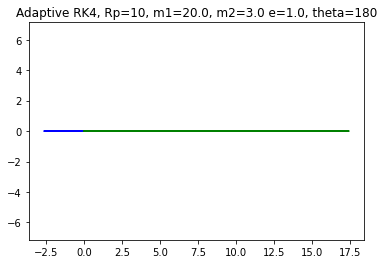

In [169]:
import matplotlib.pyplot as plt
t= np.linspace(-math.pi,math.pi,100000)
xax=-200+np.arange(0,400)
plt.ylim(-100,100)
plt.xlim(-100,100)
plt.axis('equal')
mtot=masses[0]+masses[1]
semimajor0=rad0*masses[1]/mtot
semimajor1=rad0*masses[0]/mtot
plt.title("Adaptive RK4, Rp="+str(rad0)+", m1="+str(masses[0])+", m2="+str(masses[1])+" e="+str(ecc0)+", theta="+str(round(180*theta0/math.pi)))
plt.plot(ellipsefns.getxtheory(theta0,ecc0,semimajor0,t,1),ellipsefns.getytheory(theta0,ecc0,semimajor0,t,1),'b')
plt.plot(ellipsefns.getxtheory(theta0,ecc0,semimajor1,t,-1),ellipsefns.getytheory(theta0,ecc0,semimajor1,t,-1),'g')
#plt.plot(npstar1x[:,0],npstar1x[:,1],'y')
#plt.plot(npstar2x[:,0],npstar2x[:,1],'r')
plt.show()

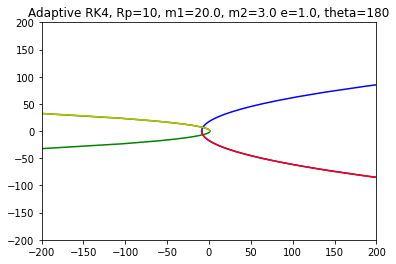

In [170]:
import matplotlib.pyplot as plt
t= np.linspace(0,2*math.pi,100)
xax=-200+np.arange(0,400)
plt.ylim(-200,200)
plt.xlim(-200,200)
semimajor0=rad0*masses[1]/mtot
semimajor1=rad0*masses[0]/mtot
plt.title("Adaptive RK4, Rp="+str(rad0)+", m1="+str(masses[0])+", m2="+str(masses[1])+" e="+str(ecc0)+", theta="+str(round(180*theta0/math.pi)))
#plt.title("Parabolic Orbit, Adaptive RK4, F="+str(rad0)+", theta="+str(round(180*theta0/math.pi)))
#plt.axis('equal')
xth1=parabfns.getxtheory(theta0,ecc0,semimajor1,t,1)
yth1=parabfns.getytheory(theta0,ecc0,semimajor1,t,1)
xth0=parabfns.getxtheory(theta0,ecc0,semimajor0,t,-1)
yth0=parabfns.getytheory(theta0,ecc0,semimajor0,t,-1)
plt.plot(xth1,yth1,'b')
plt.plot(xth0,yth0,'g')
#plt.plot(xth1,yth1,'o')
plt.plot(npstar1x[:,0],npstar1x[:,1],'y')
plt.plot(npstar2x[:,0],npstar2x[:,1],'r')
plt.show()

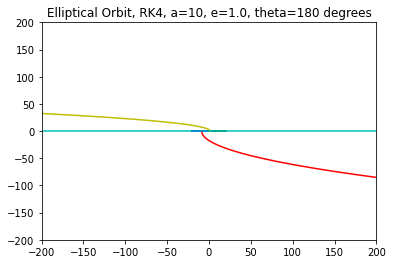

In [171]:
import matplotlib.pyplot as plt
t = np.linspace(0, 2*math.pi, 100)
xax=np.arange(0,100*len(npstar2x[:,1]))
xax=xax-len(xax)/2
oneellipse=int(len(npdt))
plt.ylim(-200,200)
plt.xlim(-200,200)
#plt.ylim(-1,1)
#plt.xlim(74.999,75)
plt.title("Elliptical Orbit, RK4, a="+str(rad0)+", e="+ str(ecc0)+", theta="+str(round(180*theta0/math.pi))+ " degrees")
plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,1),ellipsefns.getytheory(theta0,ecc0,rad0,t,1),'b')
plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,-1),ellipsefns.getytheory(theta0,ecc0,rad0,t,-1),'g')
plt.plot(npstar1x[:oneellipse,0],npstar1x[:oneellipse,1],'y')
plt.plot(npstar2x[:oneellipse,0],npstar2x[:oneellipse,1],'r')
plt.plot(xax, np.tan(theta0)*xax,'c')
plt.show()

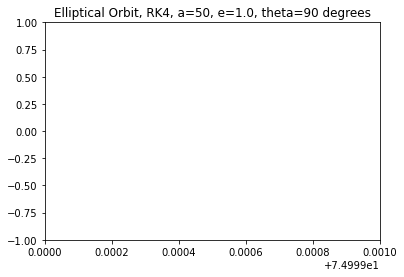

In [153]:
import matplotlib.pyplot as plt
t = np.linspace(0, 2*math.pi, 100)
xax=np.arange(0,100*len(npstar2x[:,1]))
xax=xax-len(xax)/2

#plt.ylim(-200,200)
#plt.xlim(-200,200)
plt.ylim(-1,1)
plt.xlim(74.999,75)
plt.title("Elliptical Orbit, RK4, a="+str(rad0)+", e="+ str(ecc0)+", theta="+str(round(180*theta0/math.pi))+ " degrees")
plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,1),ellipsefns.getytheory(theta0,ecc0,rad0,t,1),'b')
plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,-1),ellipsefns.getytheory(theta0,ecc0,rad0,t,-1),'g')
plt.plot(npstar1x[:oneellipse,0],npstar1x[:oneellipse,1],'*y')
plt.plot(npstar2x[:oneellipse,0],npstar2x[:oneellipse,1],'*r')
plt.plot(xax, np.tan(theta0)*xax,'c')
plt.show()

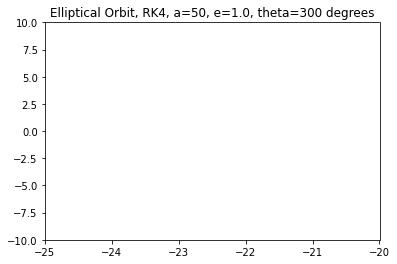

In [134]:
import matplotlib.pyplot as plt
t = np.linspace(0, 2*math.pi, 100)
xax=np.arange(0,100*len(npstar2x[:,1]))
xax=xax-len(xax)/2

#plt.ylim(-200,200)
#plt.xlim(-200,200)
plt.ylim(-10,10)
plt.xlim(-25,-20)
plt.title("Elliptical Orbit, RK4, a="+str(rad0)+", e="+ str(ecc0)+", theta="+str(round(180*theta0/math.pi))+ " degrees")
plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,1),ellipsefns.getytheory(theta0,ecc0,rad0,t,1),'b')
plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,-1),ellipsefns.getytheory(theta0,ecc0,rad0,t,-1),'g')
plt.plot(npstar1x[:,0],npstar1x[:,1],'*y')
plt.plot(npstar2x[:,0],npstar2x[:,1],'*r')
plt.plot(xax, np.tan(theta0)*xax,'c')
plt.show()

In [104]:
nperr

array([0.        , 0.00066336, 0.00098923, ..., 0.0032798 , 0.0032798 ,
       0.0032798 ])

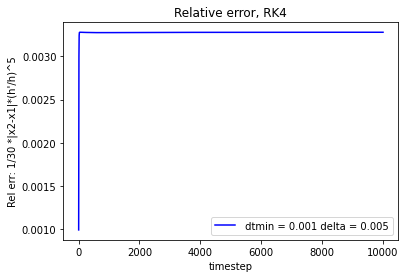

In [105]:


plt.xlabel("timestep")
plt.ylabel("Rel err: 1/30 *|x2-x1|*(h'/h)^5")
plt.title("Relative error, RK4")
relerrplt,=plt.plot(np.arange(2,oneellipse),nperr[2:oneellipse],'b',label=" dtmin = "+ str(dtmin)+" delta = "+str(delta))
plt.legend(handles=[relerrplt])
plt.show()

This curve should be constant and about equal to delta

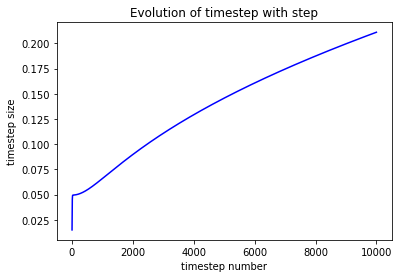

In [106]:


plt.xlabel("timestep number")
plt.ylabel("timestep size")
plt.title("Evolution of timestep with step")
relerrplt,=plt.plot(np.arange(2,oneellipse),npdt[2:oneellipse],'b',label=" dtmin = "+ str(dtmin)+" delta = "+str(delta))

plt.show()

For appropriately set tolerances, adaptive timestep no longer has feedback issues. Tol=delta=0.0005 or less. The important thing is that this curve is smooth and has no constant regions where the value is pinned to either the maximum or minimum. We also seek reasonable starting values for the timestep. 

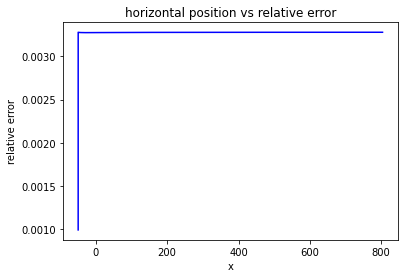

In [107]:
plt.xlabel("x")
plt.ylabel("relative error")
plt.title("horizontal position vs relative error")
plt.plot(npstar1x[2:oneellipse,0], nperr[2:oneellipse],'b')
plt.show()

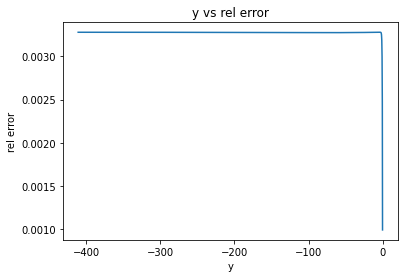

In [108]:
plt.xlabel("y")
plt.ylabel("rel error")
plt.title("y vs rel error")
plt.plot(npstar1x[2:oneellipse,1],nperr[2:oneellipse])
plt.show()

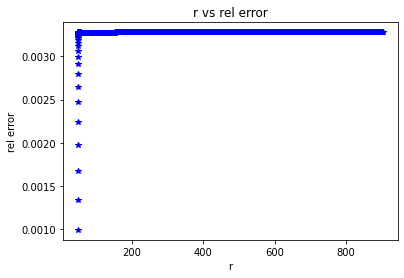

In [109]:
plt.xlabel("r")
plt.ylabel("rel error")
plt.title("r vs rel error")
rstar1x=np.sqrt(npstar1x[:,0]**2+npstar1x[:,1]**2)
plt.plot(rstar1x[2:oneellipse],nperr[2:oneellipse],'*b')
plt.show()

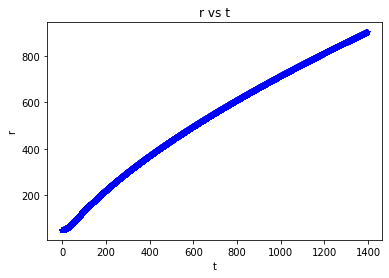

In [110]:
plt.xlabel("t")
plt.ylabel("r")
plt.title("r vs t")
plt.plot(nptimes[2:oneellipse], rstar1x[2:oneellipse], '*b')
plt.show()

In [111]:
thetaellipse = np.arctan2(npstar1x[2:oneellipse,1],npstar1x[2:oneellipse,0])

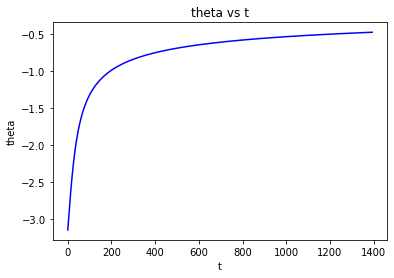

In [112]:
plt.xlabel("t")
plt.ylabel("theta")
plt.title("theta vs t")
plt.plot(nptimes[2:oneellipse],thetaellipse,'b')
plt.show()

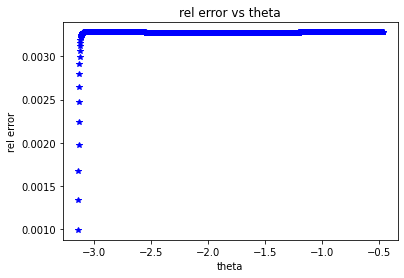

In [113]:
plt.xlabel("theta")
plt.ylabel("rel error")
plt.title("rel error vs theta")
plt.plot(thetaellipse, nperr[2:oneellipse],'*b')
plt.show()


# Conservation of angular momentum

In [ ]:
import Lstability

In [ ]:
deltaL, Lavg=Lstability.Lstability(npstar1x,npstar2x,mass0)
deltaL, Lavg

In [ ]:
deltaL*Lavg

Orbit conserves angular momentum to a tolerance of deltaL. 

# Conservation of Energy

In [ ]:
import Estability

In [ ]:
deltaE, Eavg = Estability.Estability(npstar1x, npstar2x, mass0)
deltaE, Eavg

In [ ]:
deltaE*Eavg

Orbit conserves energy to a relative error of deltaE. 

# Symmetry of the two stars orbits with respect to eachother 

In [ ]:
import orbitSymmetricTol

In [ ]:
allcancelsx, allcancelsa=orbitSymmetricTol.howSymmetric(npstar1x,npstar2x,npstar1a,npstar2a)

In [ ]:
allcancelsx

Orbit is symmetric with respect to x and v up to a tolerance of allcancelsx

In [ ]:
allcancelsa

In [ ]:
npstar1x

Orbit is symmetric with respect to a to up to or better than a tolerance of allcancelsa

# Testing for precision in perihelion and aphelion recovery from knowledge of the initial angle

In [ ]:
import aeTest

In [ ]:
from matplotlib import pyplot as plt
plt.plot( np.abs(npstar1x[:,1]))

In [ ]:
def findPerapHelionThetaIsZero(npstar1x,ecc0,rad0,useperihelion):
    maxindex=len(npstar1x[:,1])
    apindex=np.argmin(np.abs(npstar1x[10:int(maxindex/2),1]))+1
    print(apindex)
    delta=math.floor(.2*apindex)
    print(delta)
    perindex=np.argmin(np.abs(npstar1x[delta:apindex-delta,1]))+delta
    print(perindex)
    print(apindex/perindex)
    if np.abs(apindex/perindex-2.)>0.05: 
        perindex=np.argmin(np.abs(npstar1x[apindex+delta:2*apindex+delta,1]))+delta+apindex
        print(perindex)
        apindex,perindex=perindex,apindex
        print(apindex,perindex)
        print(apindex/perindex)
    #apindex3=np.argmin(np.abs(npstar1x[100:apindex2-100,1]))+100
    #apindex4=np.argmin(np.abs(npstar1x[100:apindex3-100,1]))+100
    #perindex=np.argmin(np.abs(npstar1x[100:apindex2-100,1]))+100
    if useperihelion:
        apindex,perindex=perindex,apindex
    coordap=[npstar1x[apindex,0],npstar1x[apindex,1]]
    coordper=[npstar1x[perindex,0],npstar1x[perindex,1]]
    ra=np.sqrt(np.sum(np.array(coordap)**2))
    rp=np.sqrt(np.sum(np.array(coordper)**2))
    e=(ra-rp)/(ra+rp)
    a=1./2.*(ra+rp)
    deltae=np.abs(e-ecc0)/ecc0
    deltaa=np.abs(a-rad0)/rad0
    return apindex,perindex,coordap,coordper,ra,rp,e,a,deltae,deltaa

In [ ]:
if theta0==0:
    apindex,perindex,coordap,coordper,ra,rp,e,a,deltae,deltaa=findPerapHelionThetaIsZero(npstar1x,ecc0,rad0,useperihelion)

In [ ]:
if theta0!=0:
    perindex,apindex,coordper,coordap,rp,ra,e,a,deltae,deltaa=aeTest.findPerApHelion(npstar1x,theta0,ecc0,rad0)

Recovered perihelion radius given by r_per, recovered aphelion radius given by r_ap, a is semimajor axis computed from the orbit, e is eccentricty computed from the orbit, delta a is relative error on the semimajor axis, and delta e is eccenticity relative error. 

In [ ]:
apindex,perindex,coordap,coordper,ra,rp,e,a,deltae,deltaa

In [ ]:
plt.plot(nptimes[:perindex],npstar1x[:perindex,1])

# Fit t as a function of the eccentric anomoly (angle from the center of the elipse)

In [ ]:
def findEccentricAnomoly(coordap, coordper):
    Ecenter=np.array(coordap)+np.array(coordper)
    Ecenter/=2.
    return Ecenter


In [ ]:
ellipsecenter=findEccentricAnomoly(coordap,coordper)

In [ ]:
ellipsecenter

In [ ]:
def getEllipsecenter(ecc,rad,theta, useperihelion):
    #ind of use perihelion
    rp=rad*(1-ecc)
    ra=-rad*(1+ecc)
    rcent=(rp+ra)/2
    #print(rp,ra,rcent)
    rcentx=rcent*np.cos(theta)
    rcenty=rcent* np.sin(theta)
    return [rcentx,rcenty]

In [ ]:
(np.array(coordap)+np.array(coordper))/2

In [ ]:
getEllipsecenter(ecc0,rad0,theta0, True)

In [ ]:
np.arctan2(-1.,0)/math.pi*180

In [ ]:
def getEang(npstar2x,ecc,rad,theta, useperihelion):
    ellipsecenter=getEllipsecenter(ecc,rad,theta, useperihelion)
    #print(ellipsecenter)
    #print(npstar1x)
    #print(npstar1x[:,0])
    xfortan=npstar2x[:,0]-ellipsecenter[0]
    yfortan=npstar2x[:,1]-ellipsecenter[1]
    #print("xy",xfortan,yfortan)
    Eang=np.arctan2(yfortan,xfortan)
    Eangtheta=2*np.arctan2(np.sqrt(1-ecc)*np.sin(theta/2.),np.sqrt(1+ecc)*np.cos(theta/2.))
    Eang-=Eangtheta
    #if useperihelion:
    #    Eang-=math.pi
    print(len(Eang))
    for i in np.arange(len(Eang)):
        #if xfortan[i]<0:
        #    Eang[i]+=math.pi
        if Eang[i]<0:
            Eang[i]+=2*math.pi
    print(xfortan,yfortan,Eang/math.pi*180)
    print("Eang",Eang)
    return xfortan, yfortan,Eang

In [ ]:
np.arctan2(-6.69327422*10**-6, -0.02240526)

In [ ]:
def xofeccanom(rad,Eang,ecc):
    return rad*(np.cos(Eang)+ecc)

In [ ]:
def yofeccanom(rad, Eang, ecc):
    b=getsemiminor(rad,ecc)
    return b*np.sin(Eang) 

In [ ]:
def tofEccAnom(npstar2x, rad,ecc,theta,mass, useperihelion):
    xE0,yE0,Eang=getEang(npstar2x,ecc,rad,theta, useperihelion)
    b=getsemiminor(rad,ecc)
    #fitval=rad*b*(Eang-ecc*np.sin(Eang))
    sgn=-1
    if useperihelion:
        sgn*=-1
    # added a factor of 2 in front of fitval
    fitval=rad**(1.5)*mass**(-.5)*(Eang-sgn*ecc*np.sin(Eang))
    fitval*=2
    print(Eang, ecc,rad,mass,fitval)
    return fitval

In [ ]:
def residualtEang(pars,nptimes,npstar2x):
    residual=np.abs(nptimes-tofEccAnom(npstar2x,pars['rad'],pars['ecc'],pars['theta'],pars['mass'],pars['useperihelion']))
    #print(nptimes, residual)
    return residual

In [ ]:
endindex=apindex
if useperihelion:
    endindex=perindex

In [ ]:
endindex

In [ ]:
xE0,yE0,Eang0=getEang(npstar2x[0:endindex-1,:],ecc0,rad0,theta0, useperihelion)

In [ ]:
nptimesoneorbit=nptimes[0:endindex-1]

In [ ]:
plt.plot(Eang0, xE0)

In [ ]:
plt.plot(Eang0, yE0)

In [ ]:
plt.plot(xE0,yE0)

In [ ]:
plt.plot(nptimesoneorbit,xE0)

In [ ]:
plt.plot(nptimesoneorbit,yE0)

In [ ]:
plt.plot(nptimesoneorbit,yE0/xE0)

In [ ]:
np.arctan(0./1.)

In [ ]:
yE0[0]

In [ ]:
xE0[0]

In [ ]:
plt.plot(nptimesoneorbit,np.arctan2(yE0,xE0)*180/math.pi)

In [ ]:
Eangtest=tofEccAnom(npstar2x[0:endindex-1,:],rad0,ecc0,theta0,masses[0], useperihelion)

In [ ]:
np.max(Eangtest)

In [ ]:
nptimes[0]

In [ ]:
nptimesoneorbit=nptimes[0:endindex-1]

In [ ]:
tpredoneorbit=Eangtest[0:endindex-1]

In [ ]:
Eangoneorbit=Eang0[0:endindex-1]

In [ ]:
plt.plot(nptimesoneorbit,npstar2x[0:endindex-1,1])

In [ ]:
plt.plot(nptimesoneorbit,Eangoneorbit/math.pi*180)

In [ ]:
plt.plot(nptimesoneorbit,tpredoneorbit)

In [ ]:
plt.plot(nptimesoneorbit,tpredoneorbit, label='times')
plt.xlabel("T timesteps")
plt.ylabel("T computed from angle")
plt.title("Times using start parameters")
plt.show()
plt.plot(nptimesoneorbit,tpredoneorbit-nptimesoneorbit, label='residual')
plt.legend()
plt.show()


In [ ]:
from matplotlib import pyplot as plt

In [ ]:
plt.scatter(nptimesoneorbit,tpredoneorbit)

In [ ]:
from lmfit import Minimizer,Parameters
pfittEang = Parameters()
pfittEang.add(name='theta', value=theta0, min=theta0-math.pi, max=theta0+math.pi, vary=True)
pfittEang.add(name='rad', value=rad0, min=0, vary=True)
pfittEang.add(name='ecc', value=ecc0, min=0, max=1.0, vary=True)
pfittEang.add(name='mass', value=masses[0], vary=False)
pfittEang.add(name='useperihelion', value=True, vary=False)

minit = Minimizer(residualtEang, pfittEang, fcn_args=(nptimesoneorbit,npstar2x[:endindex-1,:]))

outt = minit.leastsq()

In [ ]:
outt

Semimajor axis fit is good to about .1 percent at an eccentricity of 0.5. rad=49.886512 for delta=0.0001. rad=49.8863857 for delta = 0.0005. ecc = 0.51764747 for delta = 0.0001. ecc = 0.51765166 for delta = 0.0005. so both ecc and rad improve with a smaller delta, but not quickly. The program runs very slowly for large delta and requires 500000 timesteps for delta=0.0001. 

In [ ]:
tfinal=nptimesoneorbit[endindex-2]
tfinal

In [ ]:
from scipy.fft import fft

In [ ]:
from scipy.signal import blackman
wndow=blackman(len(nptimesoneorbit))

In [ ]:
ftresiduals=fft(nptimesoneorbit-tpredoneorbit)

In [ ]:
xf = np.linspace(0.0, 1.0/(2.0*dt), len(nptimesoneorbit)//2)

In [ ]:
plt.semilogy(xf[1:len(nptimesoneorbit)//2], 2.0/len(nptimesoneorbit) * np.abs(ftresiduals[1:len(nptimesoneorbit)//2]), '-b')

In [ ]:
ftr=fft(np.sqrt(npstar1x[:endindex-1,0]**2+npstar1x[:endindex-1,1]**2))

In [ ]:
plt.xlabel("frequency")
plt.ylabel("Fourier transform of t(E)")
plt.title("Fourier transform of time computed from eccentric anomaly")
plt.semilogy(xf[1:len(nptimesoneorbit)//2], 2.0/len(nptimesoneorbit) * np.abs(ftr[1:len(nptimesoneorbit)//2]), '-b')

This is the fourier transform of the triangle wave.

In [ ]:
plt.title("Fourier transform of residuals of times")
plt.xlabel("frequency")
plt.ylabel("FT(t(E))")
plt.semilogy(xf[1:50], 2.0/len(nptimesoneorbit) * np.abs(ftresiduals[1:50]), '-b')

In [ ]:
plt.xlabel("bin number")
plt.ylabel("FT(t(E))")
plt.title("Fourier transform of residuals of times")
plt.semilogy(np.arange(1,30), 2.0/len(nptimesoneorbit[:29]) * np.abs(ftresiduals[1:30]), '*b')

Peak at the second harmonic and the sixth harmonic. The second harmonic seems natural due to the symmetry of the orbit but the sixth harmonic is harder to explain. 

Implementing the Adaptive RK4 hasn't changed the fit, residuals, or harmonics, sadly. There is still a 2% error in the fit for an eccentricity of 0.5